In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Figure 3 - aging clock performance:

In [2]:
cell_type_name = {1:"Oligodendrocytes", 2:"Astrocytes", 3:"Microglia", 4:"T_Cells", 5:"OPCs",
                 6:"Excitatory_Neurons", 7:"Inhibitory_Neurons", 8:"Endothelial_Cells",
                 9:"Fibroblast_like_Cells", 10:"Unknown", 11:"Unknown_Neurons"}

In [4]:
sc_files = ["predictions_sc_1_0.5.csv",
            "predictions_sc_2_0.5.csv",
            "predictions_sc_3_0.5.csv",
            "predictions_sc_5_0.5.csv",
            "predictions_sc_6_0.5.csv",
            "predictions_sc_7_0.5.csv"]

prediction files returned by: training_single_cell_clocks.py

predictions can also be found in Supplementary Data 5

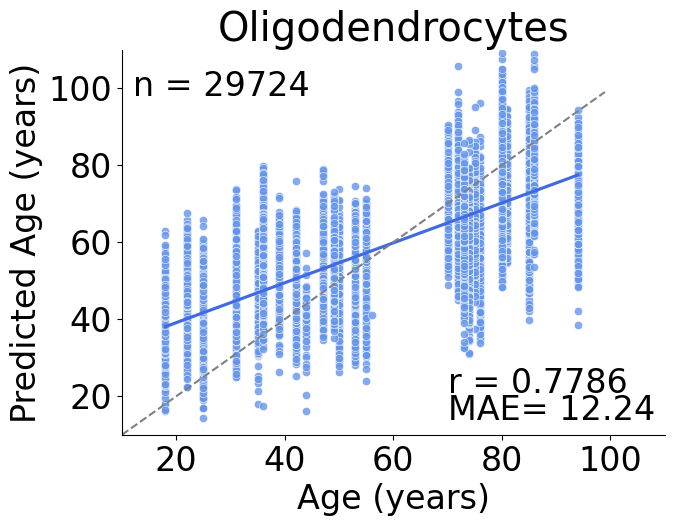

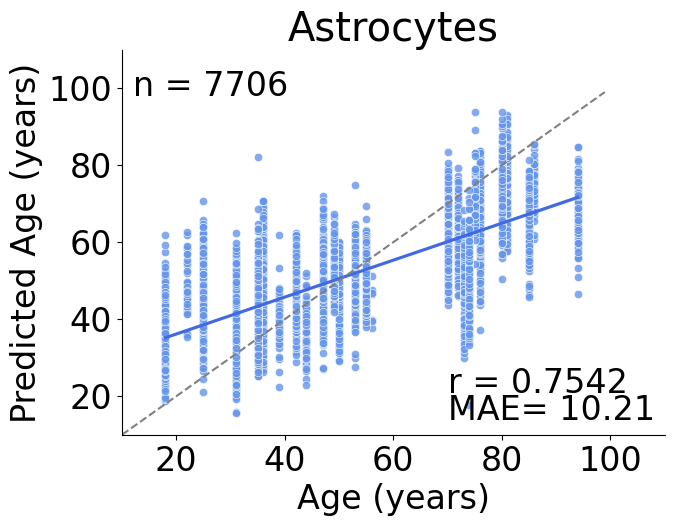

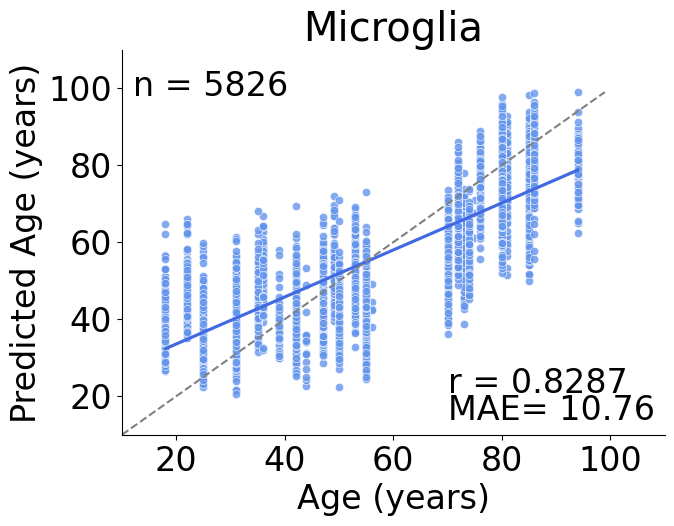

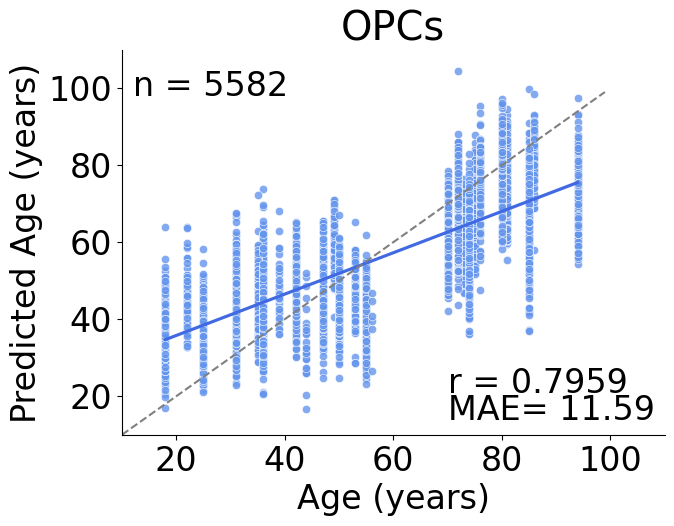

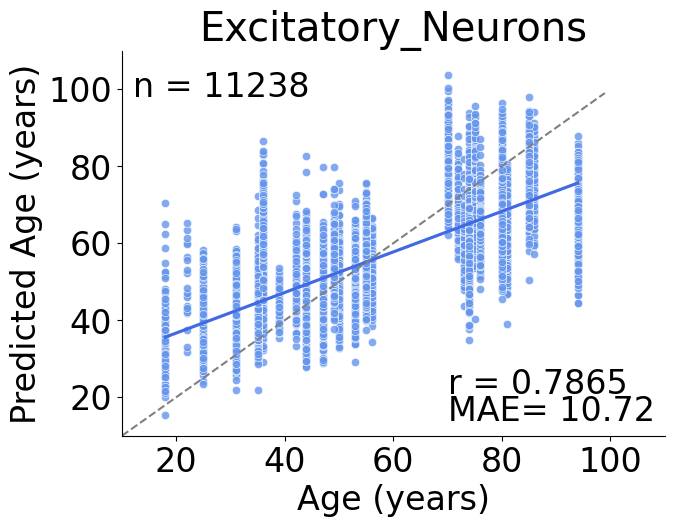

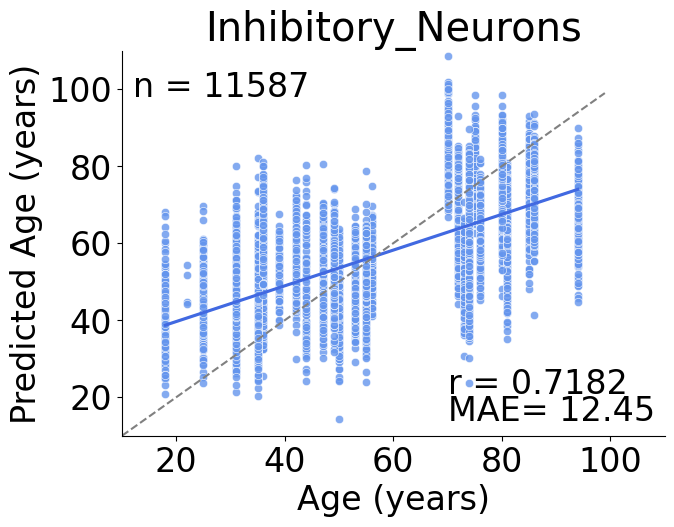

In [5]:
for file in sc_files:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("results/"+file)
    
    cell_type = cell_type_name[int(file.split("_")[3])]
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="cornflowerblue", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="royalblue")
    sns.despine()
    plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title(cell_type)

    plt.xlim(10,110)
    plt.ylim(10,110)

    plt.annotate("MAE= " +str(mae), xy=(70,14))
    plt.annotate("r = "+str(r), xy=(70,21))
    plt.annotate("n = "+str(len(df_final)), xy=(12,98))
    #plt.savefig("figures/article/sc_"+cell_type+".pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [ ]:
pb_files = ["predictions_pseudobulk_celltype_bootstrapped_1_0.5_.csv",
            "predictions_pseudobulk_celltype_bootstrapped_2_0.5_.csv",
            "predictions_pseudobulk_celltype_bootstrapped_3_0.5_.csv",
            "predictions_pseudobulk_celltype_bootstrapped_5_0.5_.csv",
            "predictions_pseudobulk_celltype_bootstrapped_6_0.5_.csv",
            "predictions_pseudobulk_celltype_bootstrapped_7_0.5_.csv"]

prediction files returned by: training_cell_type_specific_bootstrapped_pseudobulk_clocks.py

predictions can also be found in Supplementary Data 5

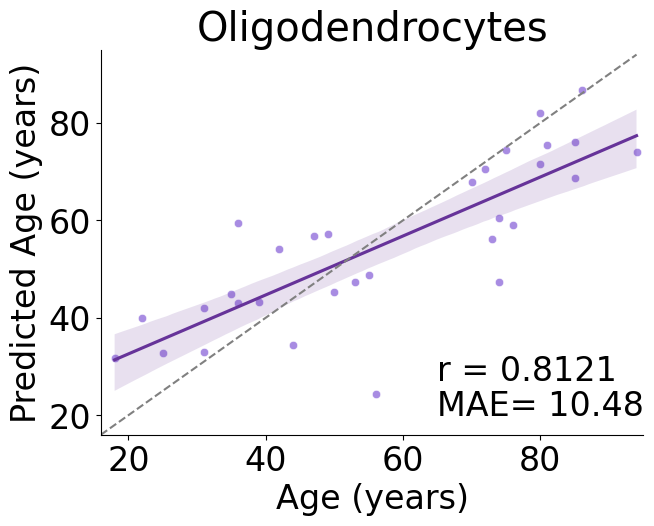

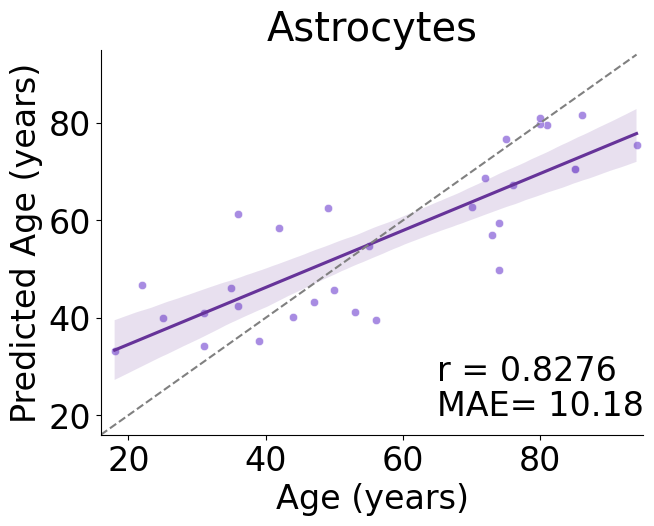

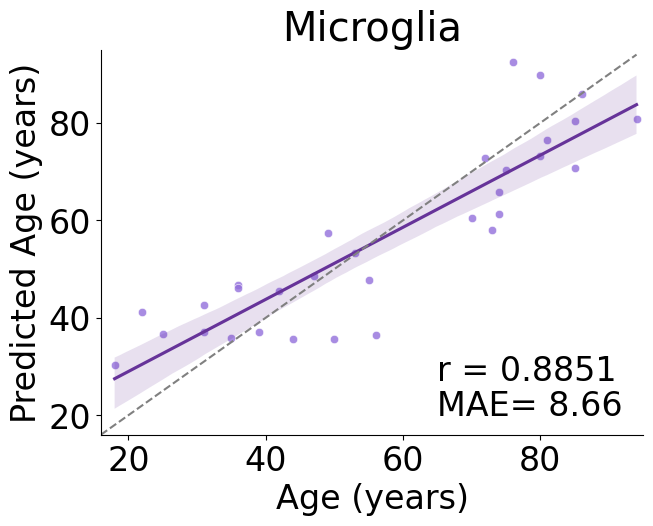

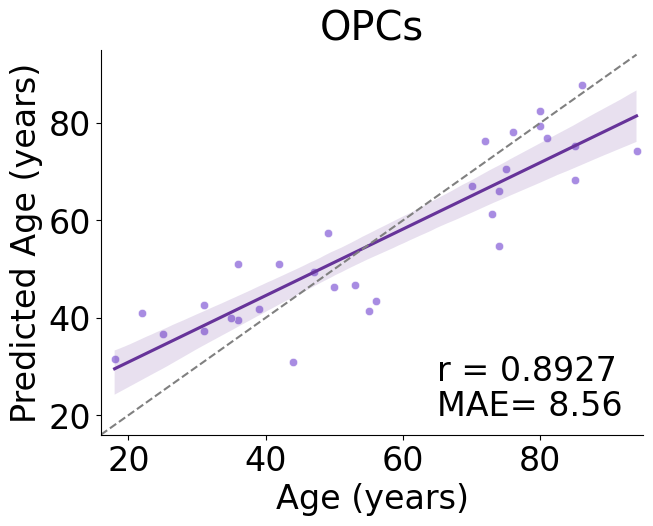

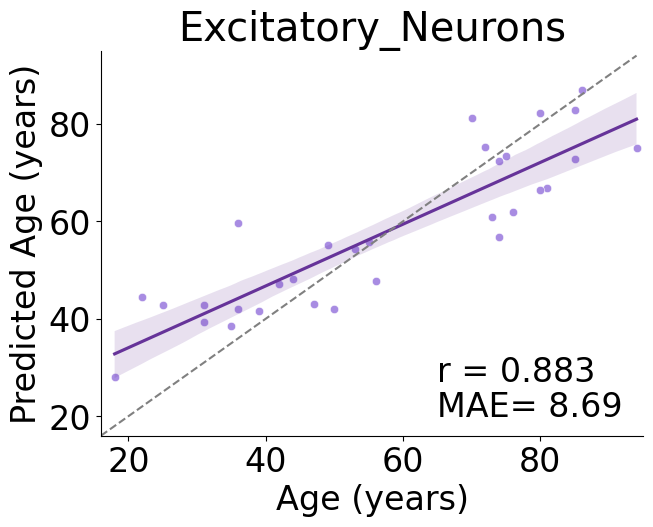

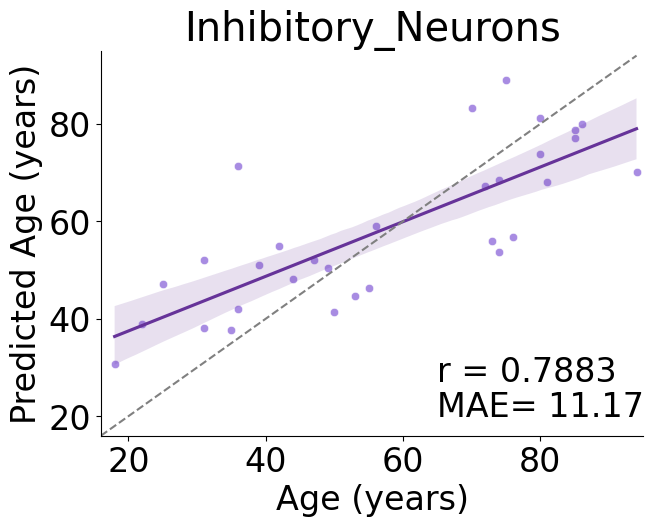

In [3]:
for file in pb_files:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("results/"+file)
    df_final = df_final[["age", "donor_id", "predicted_age"]].groupby("donor_id").mean()
    
    cell_type = cell_type_name[int(file.split("_")[4])]
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="mediumpurple", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="rebeccapurple")
    sns.despine()
    plt.plot(range(16,95), range(16,95), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title(cell_type)
    plt.xlim(16,95)
    plt.ylim(16,95)
    plt.annotate("MAE= " +str(mae), xy=(65,20))
    plt.annotate("r = "+str(r), xy=(65,27))
    #plt.annotate("n = "+str(len(df_final)), xy=(18,85))
    #plt.savefig("figures/article/pseudobulk_"+cell_type+".pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [8]:
results = pd.read_excel("auxiliary_files_for_figures/cell_type_specific_clock_performance.xlsx")
results

cell_type               clock_type bootstrapped  \
0     Oligodendrocytes              single-cell           no   
1     Oligodendrocytes               pseudobulk           no   
2     Oligodendrocytes  pseudobulk bootstrapped          yes   
3           Astrocytes              single-cell           no   
4           Astrocytes               pseudobulk           no   
5           Astrocytes  pseudobulk bootstrapped          yes   
6            Microglia              single-cell           no   
7            Microglia               pseudobulk           no   
8            Microglia  pseudobulk bootstrapped          yes   
9                 OPCs              single-cell           no   
10                OPCs               pseudobulk           no   
11                OPCs  pseudobulk bootstrapped          yes   
12  Excitatory_Neurons              single-cell           no   
13  Excitatory_Neurons               pseudobulk           no   
14  Excitatory_Neurons  pseudobulk bootstrapped          yes   
15  Inhibitory_Neurons              single-cell           no   
16  Inhibitory_Neurons               pseudobulk           no   
17  Inhibitory_Neurons  pseudobulk bootstrapped          yes   

    num_of_sampled_cells  alpha     r    MAE  
0                    NaN    0.5  0.78  12.23  
1                    NaN    0.5  0.47  17.91  
2                  200.0    0.5  0.81  10.48  
3                    NaN    0.5  0.75  10.22  
4                    NaN    0.5  0.52  16.74  
5                   50.0    0.5  0.83  10.18  
6                    NaN    0.5  0.83  10.76  
7                    NaN    0.5  0.44  16.52  
8                   50.0    0.5  0.89   8.66  
9                    NaN    0.5  0.80  11.59  
10                   NaN    0.5  0.88  10.57  
11                  50.0    0.5  0.89   8.56  
12                   NaN    0.5  0.79  10.72  
13                   NaN    0.5  0.62  15.81  
14                 100.0    0.5  0.88   8.69  
15                   NaN    0.5  0.72  12.45  
16                   NaN    0.5  0.14  18.77  
17                 100.0    0.5  0.79  11.17

Summary of the clock performances can also be found in Supplementary Data 6

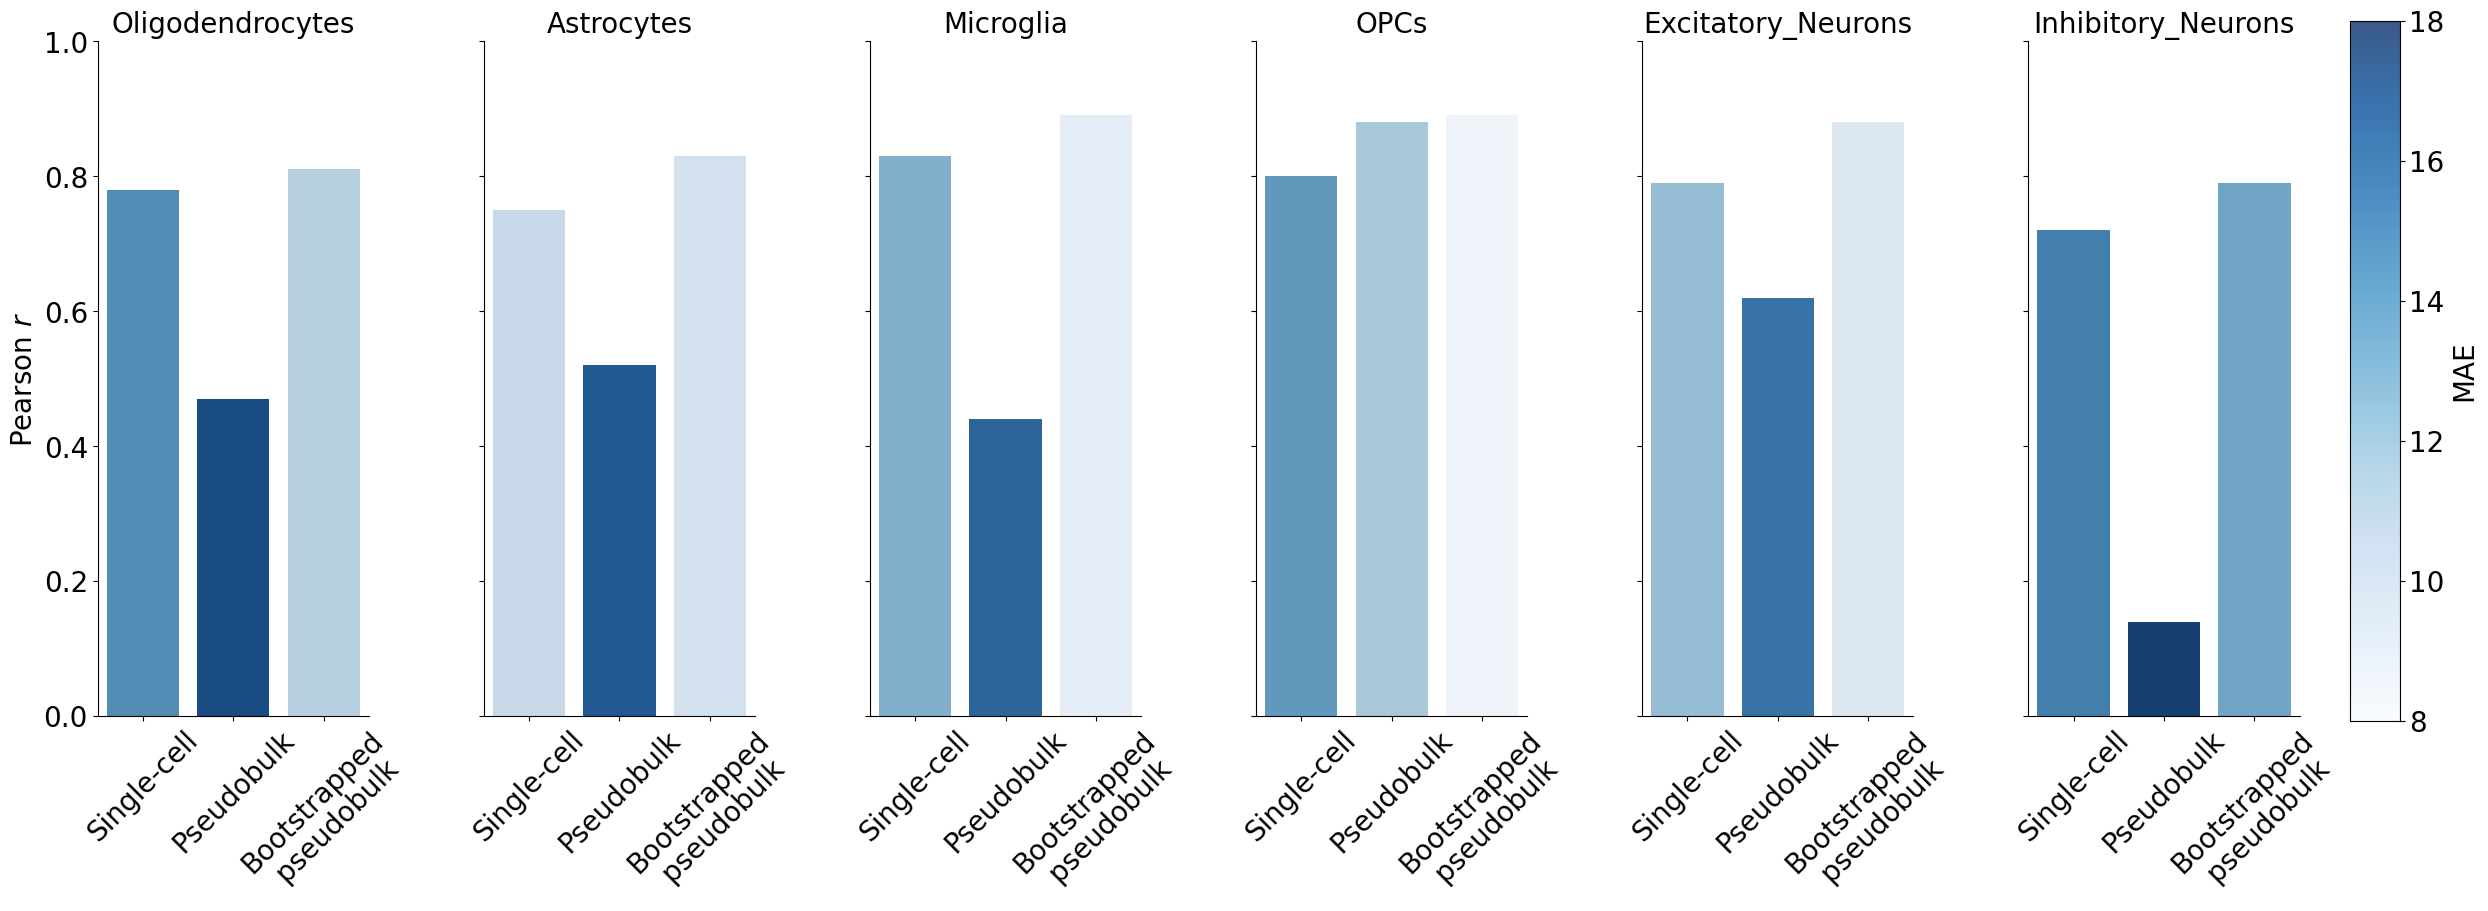

In [7]:
matplotlib.rcParams.update({'font.size': 20})

g=sns.catplot(data=results, x="clock_type", y="r", col="cell_type", kind="bar", hue="MAE", palette="Blues", 
              dodge = False, legend=False)
#g.bar_label(ax.containers[0], fontsize=10)
g.fig.subplots_adjust(right=.92)
cax = g.fig.add_axes([.94, .2, .02, .7])
points = plt.scatter([], [], c=[], vmin=8, vmax=18, cmap="Blues", alpha=0.8)
g.fig.colorbar(points, cax=cax, label="MAE")
g.set_axis_labels("", r"Pearson $r$")
g.set_xticklabels(["Single-cell", "Pseudobulk", "Bootstrapped\n pseudobulk"], rotation=45)
g.set_titles("{col_name}")
g.set(ylim=(0, 1))
plt.gcf().set_size_inches(25, 10)
#g.despine(left=True)
#plt.savefig("figures/article/results_cell_type_specific.pdf", bbox_inches="tight")
plt.show()

# Supplementary Figure 3 - non-cell-type-specific aging clock performance:

prediction file returned by: training_all_cells_bootstrapped_pseudobulk_clocks.py

predictions can also be found in Supplementary Data 5

Text(65, 27, 'r = 0.8977')

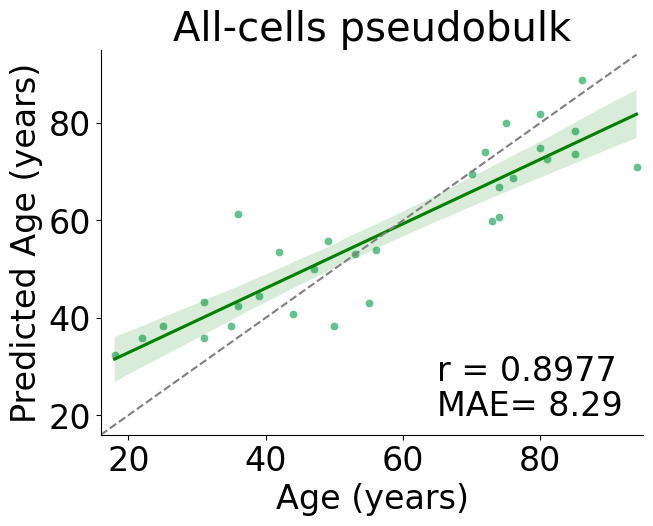

In [9]:
fig = plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 24})
    
df_final = pd.read_csv("results/"+"predictions_pseudobulk_100_bootstrapped_0.5_.csv")
df_final = df_final[["age", "donor_id", "predicted_age"]].groupby("donor_id").mean()
    
sns.despine()
sns.scatterplot(data=df_final, x="age", y="predicted_age", color="mediumseagreen", alpha=0.8)
sns.despine()
sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="green")
sns.despine()
plt.plot(range(16,95), range(16,95), color="grey", linestyle="dashed")
    
r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
plt.xlabel("Age (years)")
plt.ylabel("Predicted Age (years)")
plt.title("All-cells pseudobulk")
plt.xlim(16,95)
plt.ylim(16,95)
plt.annotate("MAE= " +str(mae), xy=(65,20))
plt.annotate("r = "+str(r), xy=(65,27))
#plt.annotate("n = "+str(len(df_final)), xy=(18,85))
#plt.savefig("figures/article/pseudobulk.pdf", bbox_inches="tight")

prediction file returned by: training_glia_level_pseudobulk_clocks.py

predictions can also be found in Supplementary Data 5

Text(65, 27, 'r = 0.844')

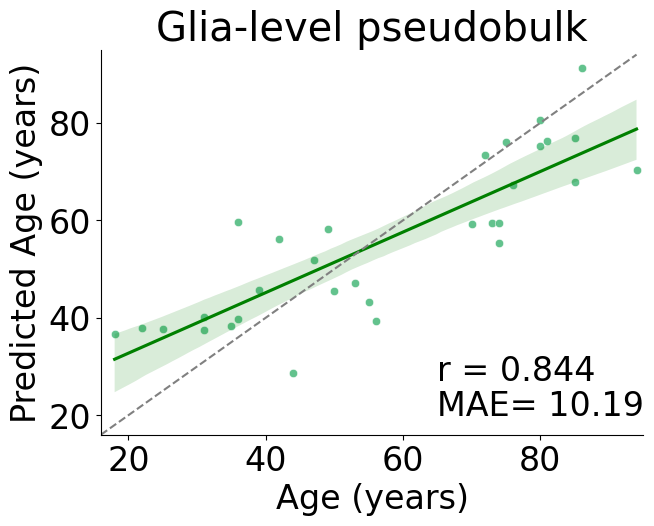

In [10]:
fig = plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 24})
    
df_final = pd.read_csv("results/"+"predictions_pseudobulk_glia_100_bootstrapped_0.5_.csv")
df_final = df_final[["age", "donor_id", "predicted_age"]].groupby("donor_id").mean()
    
sns.despine()
sns.scatterplot(data=df_final, x="age", y="predicted_age", color="mediumseagreen", alpha=0.8)
sns.despine()
sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="green")
sns.despine()
plt.plot(range(16,95), range(16,95), color="grey", linestyle="dashed")
    
r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
plt.xlabel("Age (years)")
plt.ylabel("Predicted Age (years)")
plt.title("Glia-level pseudobulk")
plt.xlim(16,95)
plt.ylim(16,95)
plt.annotate("MAE= " +str(mae), xy=(65,20))
plt.annotate("r = "+str(r), xy=(65,27))
#plt.annotate("n = "+str(len(df_final)), xy=(18,85))
#plt.savefig("figures/article/pseudobulk_glia.pdf", bbox_inches="tight")

prediction file returned by: training_neuron_level_pseudobulk_clocks.py

predictions can also be found in Supplementary Data 5

Text(65, 27, 'r = 0.8426')

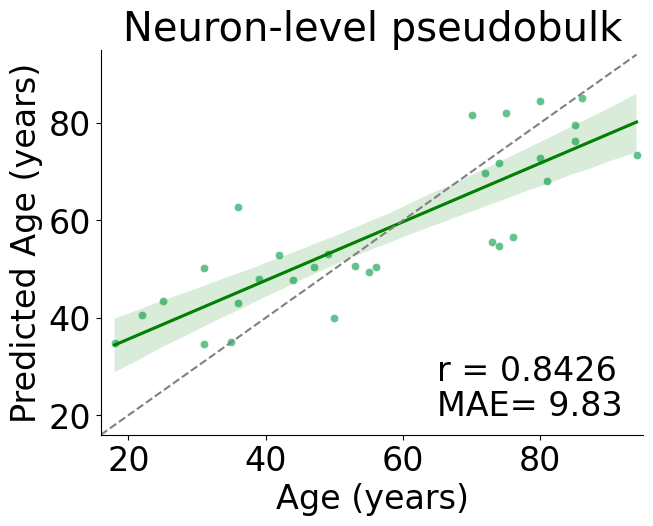

In [11]:
fig = plt.figure(figsize=(7,5))
matplotlib.rcParams.update({'font.size': 24})
    
df_final = pd.read_csv("results/"+"predictions_pseudobulk_neuron_100_bootstrapped_0.5_.csv")
df_final = df_final[["age", "donor_id", "predicted_age"]].groupby("donor_id").mean()
    
sns.despine()
sns.scatterplot(data=df_final, x="age", y="predicted_age", color="mediumseagreen", alpha=0.8)
sns.despine()
sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="green")
sns.despine()
plt.plot(range(16,95), range(16,95), color="grey", linestyle="dashed")
    
r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
plt.xlabel("Age (years)")
plt.ylabel("Predicted Age (years)")
plt.title("Neuron-level pseudobulk")
plt.xlim(16,95)
plt.ylim(16,95)
plt.annotate("MAE= " +str(mae), xy=(65,20))
plt.annotate("r = "+str(r), xy=(65,27))
#plt.annotate("n = "+str(len(df_final)), xy=(18,85))
#plt.savefig("figures/article/pseudobulk_neuron.pdf", bbox_inches="tight")

In [12]:
results = pd.read_excel("auxiliary_files_for_figures/non_cell_type_specific_clock_performance.xlsx")
results

clock_type        clock_name  \
0     All-cells pseudobulk            Simple   
1     All-cells pseudobulk  Bootstrapped 500   
2     All-cells pseudobulk  Bootstrapped 100   
3    Glia-level pseudobulk            Simple   
4    Glia-level pseudobulk  Bootstrapped 500   
5    Glia-level pseudobulk  Bootstrapped 100   
6  Neuron-level pseudobulk            Simple   
7  Neuron-level pseudobulk  Bootstrapped 500   
8  Neuron-level pseudobulk  Bootstrapped 100   

                           clock_name_whole bootstrapped  \
0                      all cells pseudobulk           no   
1     all cells pseudobulk bootstrapped 500          yes   
2     all cells pseudobulk bootstrapped 100          yes   
3                     glia-level pseudobulk           no   
4    glia-level pseudobulk bootstrapped 500          yes   
5    glia-level pseudobulk bootstrapped 100          yes   
6                   neuron-level pseudobulk           no   
7  neuron-level pseudobulk bootstrapped 500          yes   
8  neuron-level pseudobulk bootstrapped 100          yes   

   num_of_sampled_cells  alpha     r    MAE  
0                   NaN    0.5  0.58  15.30  
1                 500.0    0.5  0.90   8.30  
2                 100.0    0.5  0.90   8.29  
3                   NaN    0.5  0.17  20.17  
4                 500.0    0.5  0.84  10.32  
5                 100.0    0.5  0.84  10.19  
6                   NaN    0.5  0.46  17.05  
7                 500.0    0.5  0.81  10.40  
8                 100.0    0.5  0.84   9.83

Summary of the clock performances can also be found in Supplementary Data 6

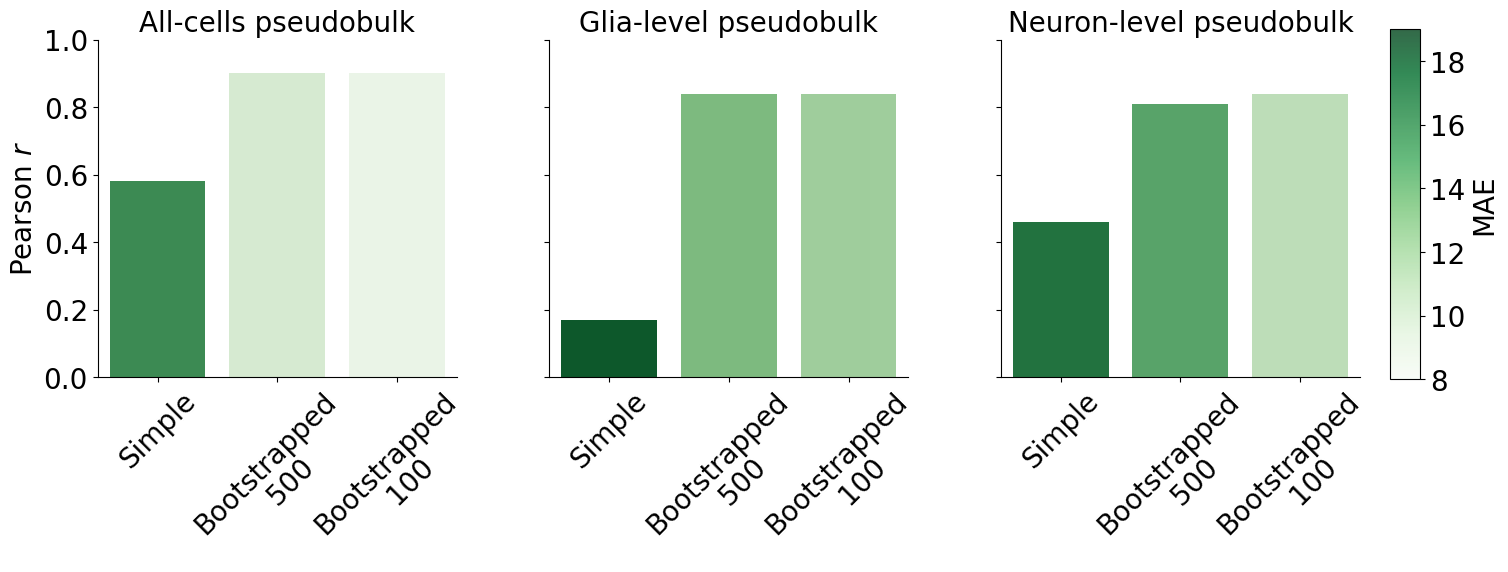

In [13]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

g=sns.catplot(data=results, x="clock_name", y="r", col="clock_type", kind="bar", hue="MAE", palette="Greens", 
              dodge = False, legend=False)
#g.bar_label(ax.containers[0], fontsize=10)
g.fig.subplots_adjust(right=.92)
cax = g.fig.add_axes([.94, .2, .02, .7])
points = plt.scatter([], [], c=[], vmin=8, vmax=19, cmap="Greens", alpha=0.8)
g.fig.colorbar(points, cax=cax, label="MAE")
g.set_axis_labels("", r"Pearson $r$")
g.set_xticklabels(["Simple", "Bootstrapped\n 500", "Bootstrapped\n 100"], rotation=45)
g.set_titles("{col_name}")
g.set(ylim=(0, 1))
plt.gcf().set_size_inches(15,5)
#g.despine(left=True)
#plt.savefig("figures/article/results_non_cell_type_specific.pdf", bbox_inches="tight")
plt.show()

# Figure 4 - Validation of aging clocks on Fröhlich et al. dataset:

In [24]:
files_to_plot = ["frohlich_sc_lognormed_0.5_Oligodendrocytes.csv",
                 "frohlich_sc_lognormed_0.5_Astrocytes.csv",
                 "frohlich_sc_lognormed_0.5_Microglia.csv",
                 "frohlich_sc_lognormed_0.5_OPCs.csv",
                 "frohlich_sc_lognormed_0.5_Excitatory_Neurons.csv",
                 "frohlich_sc_lognormed_0.5_Inhibitory_Neurons.csv"]

prediction files returned by: apply_cell_type_specific_clocks_frohlich.py

predictions can also be found in Supplementary Data 7

/tmp/ipykernel_3295210/1755596145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


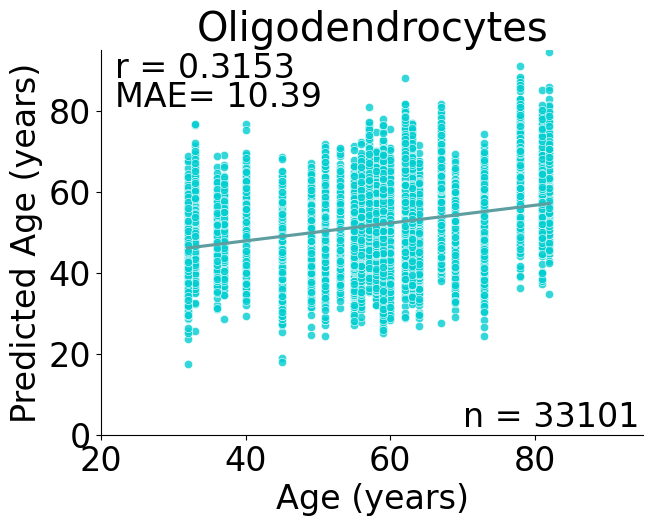

/tmp/ipykernel_3295210/1755596145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


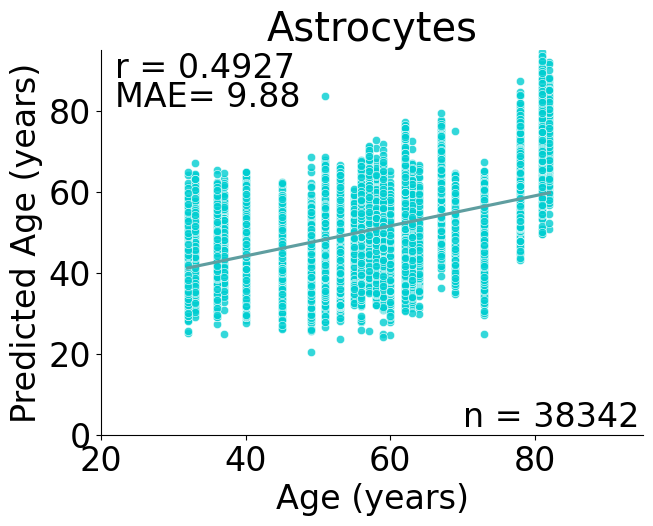

/tmp/ipykernel_3295210/1755596145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


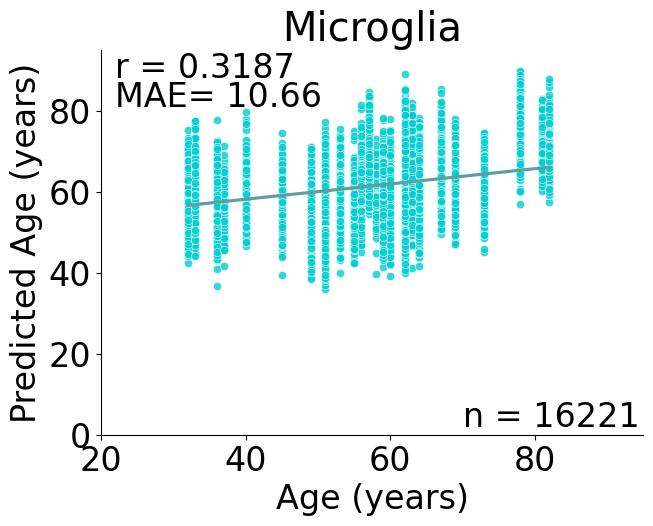

/tmp/ipykernel_3295210/1755596145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


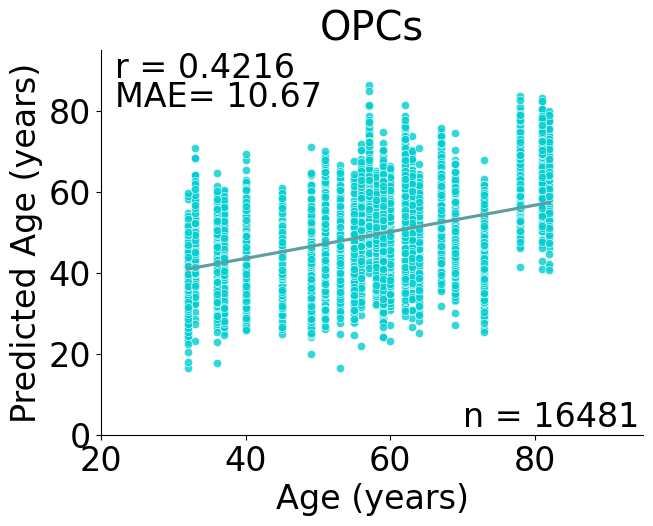

/tmp/ipykernel_3295210/1755596145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


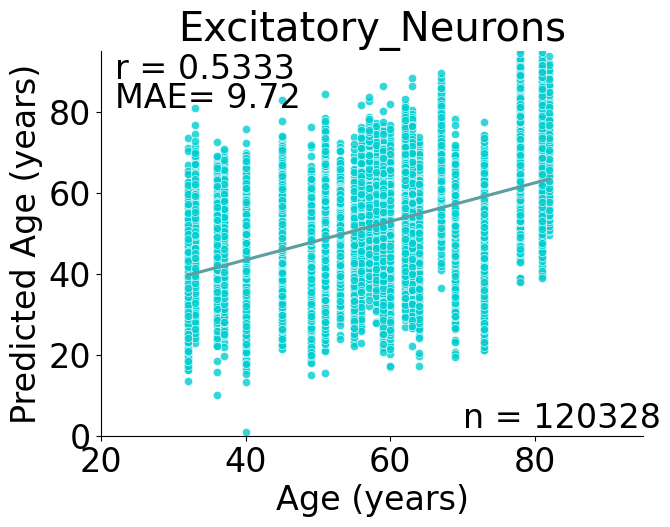

/tmp/ipykernel_3295210/1755596145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


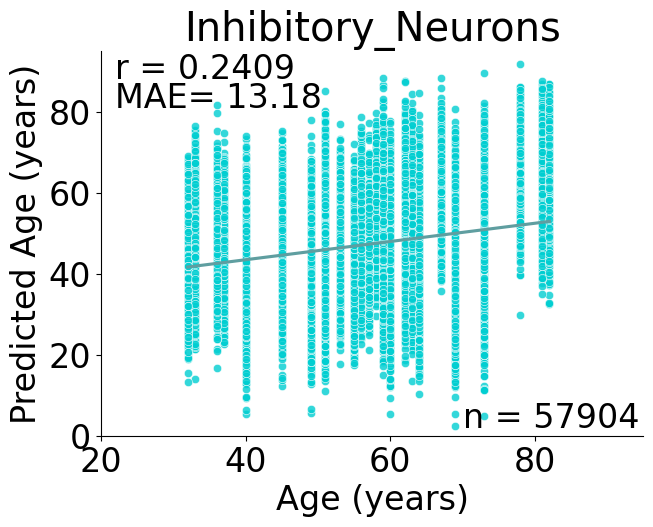

In [25]:
import matplotlib
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("cell_name").mean()
    if "Exc" in file:
        cell_type = "Excitatory_Neurons"
        alpha = file.split("_")[3]
    elif "In" in file:
        cell_type = "Inhibitory_Neurons"
        alpha = file.split("_")[3]
    else:
        cell_type = file.split("_")[4][:-4]
        alpha = file.split("_")[3]
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="darkturquoise", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="cadetblue")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title(cell_type)

    plt.xlim(20,95)
    plt.ylim(0,95)

    plt.annotate("MAE= " +str(mae), xy=(22,81))
    plt.annotate("r = "+str(r), xy=(22,88))
    plt.annotate("n = "+str(len(df_final)), xy=(70,2))
    #plt.savefig("figures/article/frohlich_sc_"+cell_type+"_lognormed.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [22]:
files_to_plot = ["frohlich_celltype_pseudobulk_bootstrapped_lognormed_0.5_Oligodendrocytes.csv",
                 "frohlich_celltype_pseudobulk_bootstrapped_lognormed_0.5_Astrocytes.csv",
                 "frohlich_celltype_pseudobulk_bootstrapped_lognormed_0.5_Microglia.csv",
                 "frohlich_celltype_pseudobulk_bootstrapped_lognormed_0.5_OPCs.csv",
                 "frohlich_celltype_pseudobulk_bootstrapped_lognormed_0.5_Excitatory_Neurons.csv",
                 "frohlich_celltype_pseudobulk_bootstrapped_lognormed_0.5_Inhibitory_Neurons.csv"]

prediction files returned by: apply_cell_type_specific_clocks_frohlich.py

predictions can also be found in Supplementary Data 7

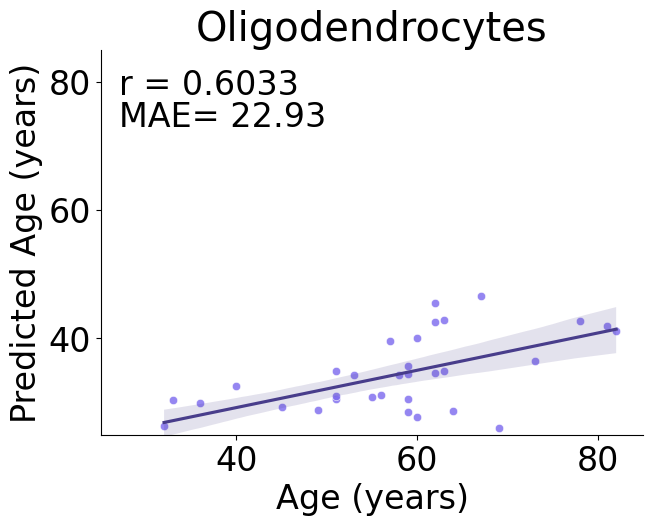

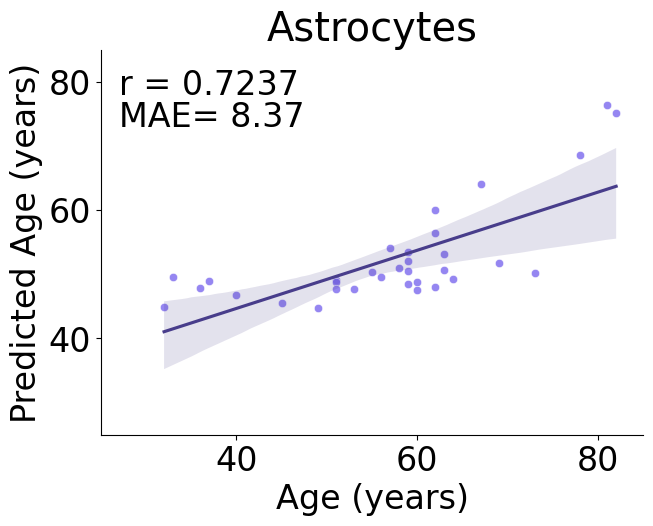

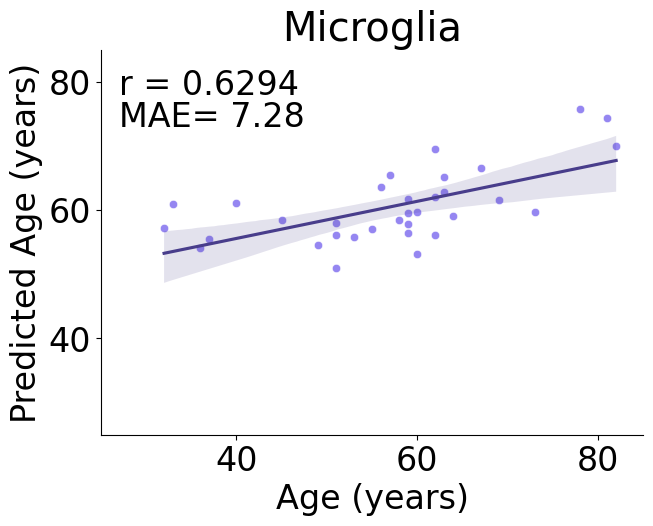

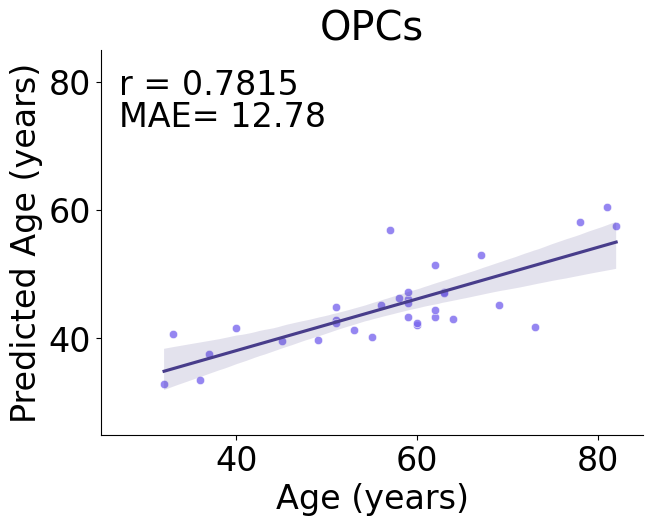

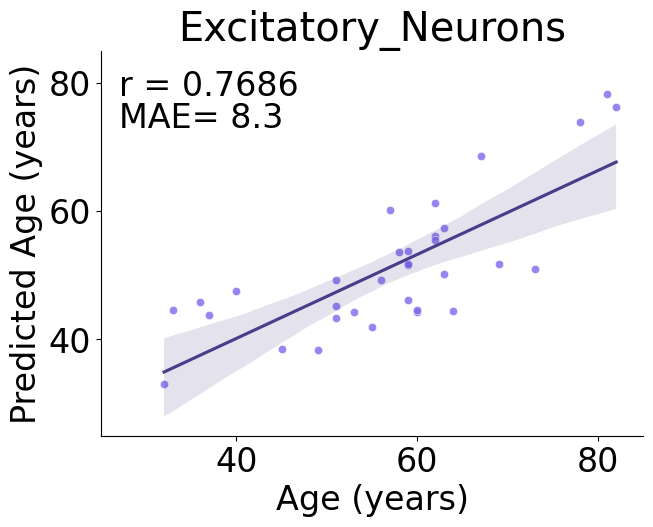

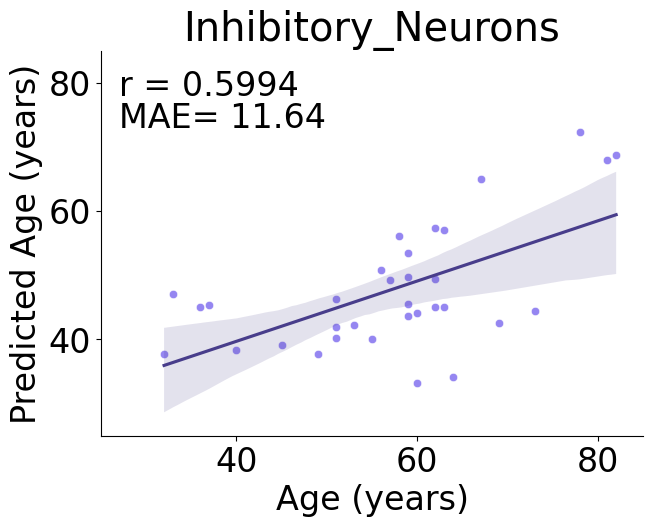

In [23]:
import matplotlib
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    if "Exc" in file:
        cell_type = "Excitatory_Neurons"
        alpha = file.split("_")[5]
    elif "In" in file:
        cell_type = "Inhibitory_Neurons"
        alpha = file.split("_")[5]
    else:
        cell_type = file.split("_")[6][:-4]
        alpha = file.split("_")[5]
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="mediumslateblue", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="darkslateblue")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title(cell_type)

    plt.xlim(25,85)
    plt.ylim(25,85)

    plt.annotate("MAE= " +str(mae), xy=(27,73))
    plt.annotate("r = "+str(r), xy=(27,78))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/frohlich_pseudobulk_bootstrapped_"+cell_type+"_lognormed.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [14]:
results = pd.read_excel("auxiliary_files_for_figures/cell_type_specific_external_performance.xlsx")
results

cell_type               clock_type  Frohlich_r_orig  \
0     Oligodendrocytes              Single-cell             0.32   
1     Oligodendrocytes               Pseudobulk             0.53   
2     Oligodendrocytes  Bootstrapped pseudobulk             0.60   
3           Astrocytes              Single-cell             0.50   
4           Astrocytes               Pseudobulk             0.68   
5           Astrocytes  Bootstrapped pseudobulk             0.73   
6            Microglia              Single-cell             0.34   
7            Microglia               Pseudobulk             0.54   
8            Microglia  Bootstrapped pseudobulk             0.65   
9                 OPCs              Single-cell             0.42   
10                OPCs               Pseudobulk             0.79   
11                OPCs  Bootstrapped pseudobulk             0.78   
12  Excitatory_Neurons              Single-cell             0.55   
13  Excitatory_Neurons               Pseudobulk             0.68   
14  Excitatory_Neurons  Bootstrapped pseudobulk             0.78   
15  Inhibitory_Neurons              Single-cell             0.23   
16  Inhibitory_Neurons               Pseudobulk             0.42   
17  Inhibitory_Neurons  Bootstrapped pseudobulk             0.56   

    Frohlich_mae_orig  Frohlich_r  Frohlich_mae  Velmeshev_r  Velmeshev_mae  \
0                8.94        0.32         10.39         0.19          24.16   
1               11.04        0.53         13.05        -0.26          24.02   
2               15.58        0.60         22.93        -0.03          19.88   
3                8.15        0.49          9.88         0.16          18.62   
4                9.19        0.66          9.86         0.35          22.82   
5                7.13        0.72          8.37         0.36          20.13   
6                9.27        0.32         10.66         0.15          22.44   
7                9.25        0.46          9.65         0.28          27.18   
8                7.66        0.63          7.28         0.53          21.34   
9                8.85        0.42         10.67         0.24          16.70   
10               8.18        0.79          9.17         0.77          17.94   
11               8.49        0.78         12.78         0.69          14.61   
12               7.60        0.53          9.72         0.32          17.12   
13               7.87        0.69         12.30         0.05          17.83   
14               8.84        0.77          8.30         0.57          11.75   
15               9.98        0.24         13.18         0.28          22.44   
16              10.41        0.46         10.02         0.61          28.93   
17               9.09        0.60         11.64         0.68          23.66   

       v_color  
0   blueviolet  
1         grey  
2         grey  
3   blueviolet  
4         grey  
5         grey  
6   blueviolet  
7         grey  
8         grey  
9   blueviolet  
10  blueviolet  
11  blueviolet  
12  blueviolet  
13        grey  
14        grey  
15  blueviolet  
16  blueviolet  
17  blueviolet

Summary of the clock performances can also be found in Supplementary Data 9

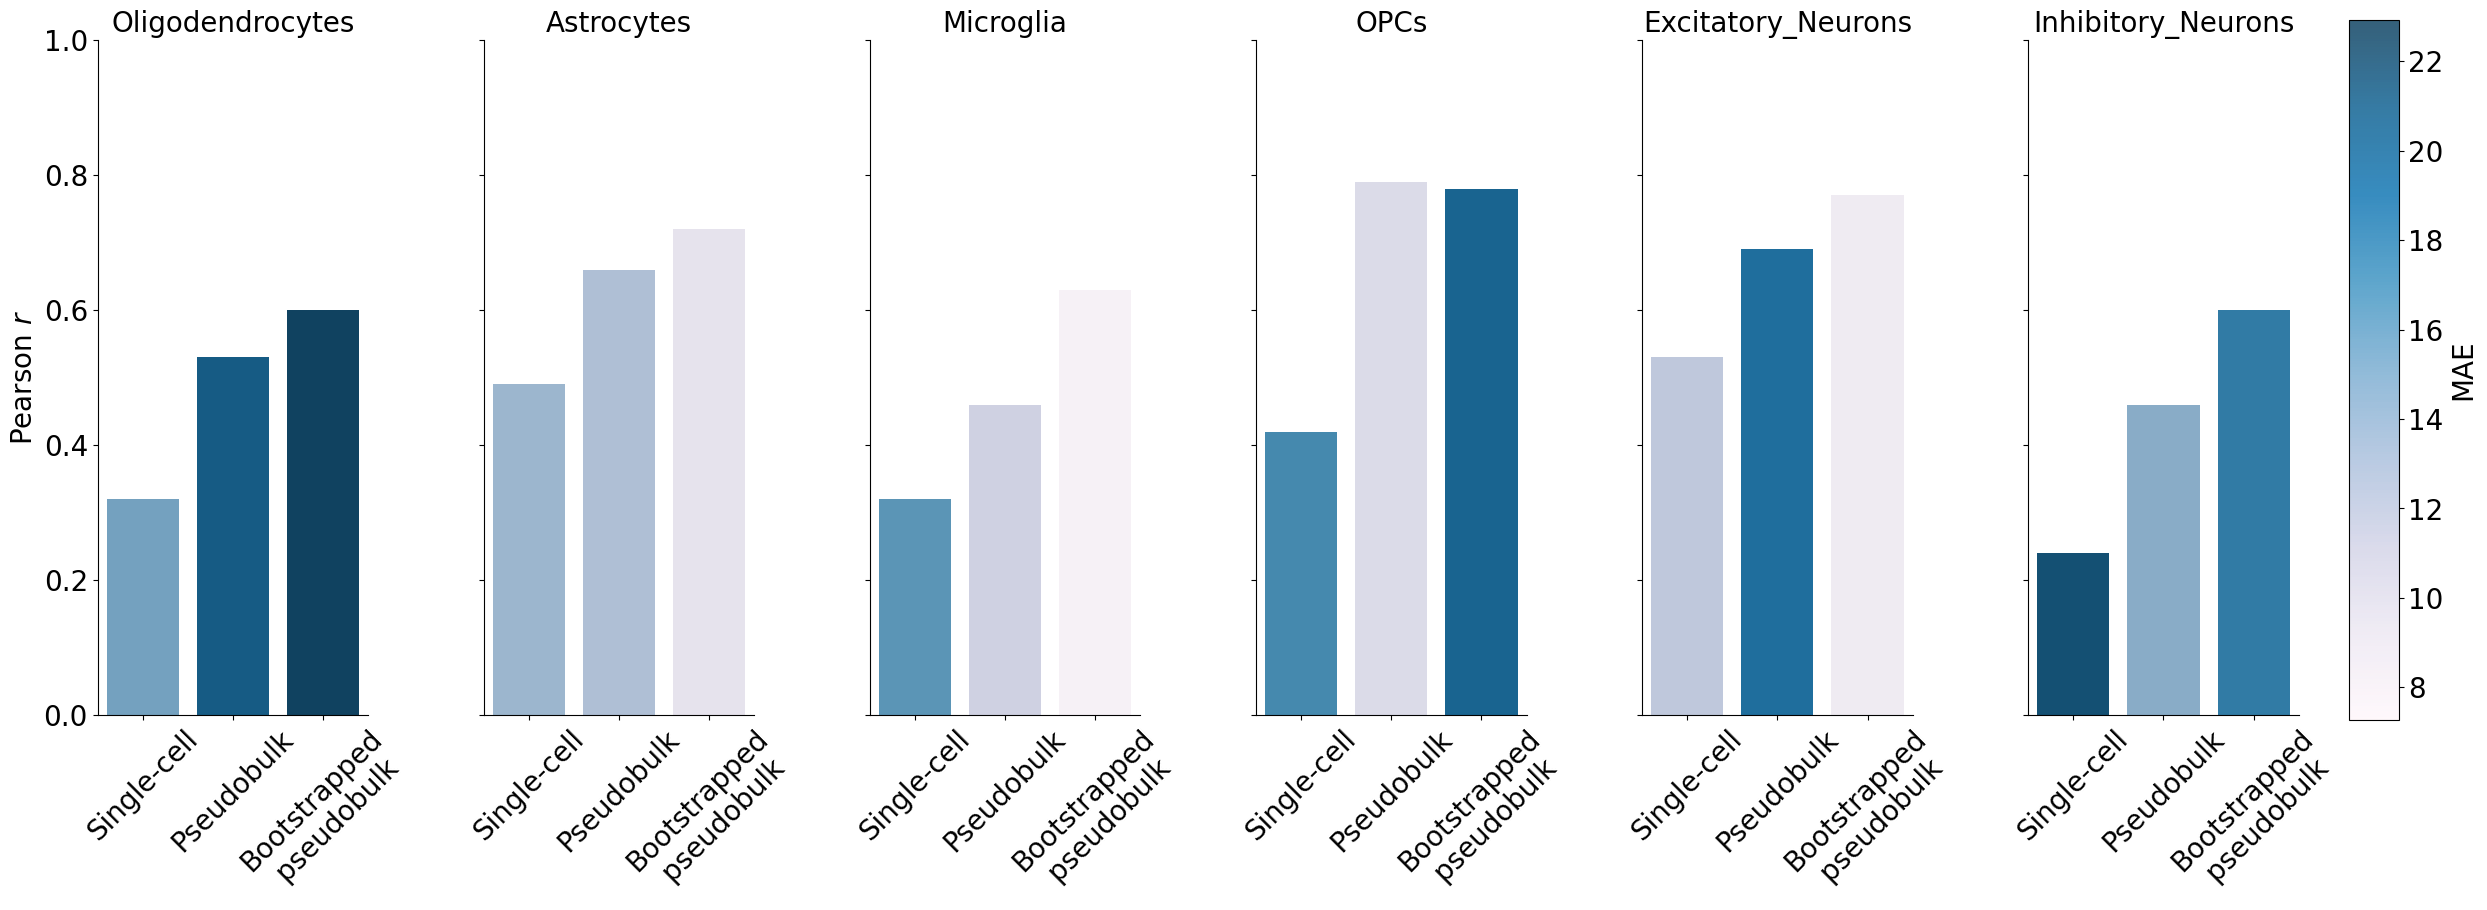

In [15]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

g=sns.catplot(data=results, x="clock_type", y="Frohlich_r", col="cell_type", kind="bar", hue="Frohlich_mae", palette="PuBu", 
              dodge = False, legend=False)
#g.bar_label(ax.containers[0], fontsize=10)
g.fig.subplots_adjust(right=.92)
cax = g.fig.add_axes([.94, .2, .02, .7])
points = plt.scatter([], [], c=[], vmin=min(results["Frohlich_mae"]), vmax=max(results["Frohlich_mae"]), cmap="PuBu", alpha=0.8)
g.fig.colorbar(points, cax=cax, label="MAE")
g.set_axis_labels("", r"Pearson $r$")
g.set_xticklabels(["Single-cell", "Pseudobulk", "Bootstrapped\n pseudobulk"], rotation=45)
g.set_titles("{col_name}")
g.set(ylim=(0, 1))
plt.gcf().set_size_inches(25, 10)
#g.despine(left=True)
#plt.savefig("figures/article/results_frohlich_cell_type_specific_lognormed.pdf", bbox_inches="tight")
plt.show()

prediction file returned by: apply_non_cell_type_specific_clocks_frohlich.py

predictions can also be found in Supplementary Data 7

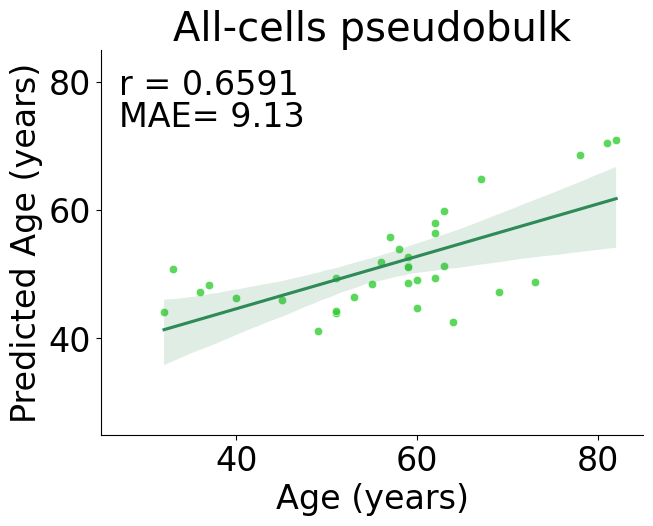

In [26]:
import matplotlib

files_to_plot = ["frohlich_pseudobulk_bootstrapped100_lognormed_0.5.csv"]
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="limegreen", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="seagreen")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title("All-cells pseudobulk")

    plt.xlim(25,85)
    plt.ylim(25,85)

    plt.annotate("MAE= " +str(mae), xy=(27,73))
    plt.annotate("r = "+str(r), xy=(27,78))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/frohlich_allcells_pseudobulk_bootstrapped_lognormed.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

prediction file returned by: apply_non_cell_type_specific_clocks_frohlich.py

predictions can also be found in Supplementary Data 7

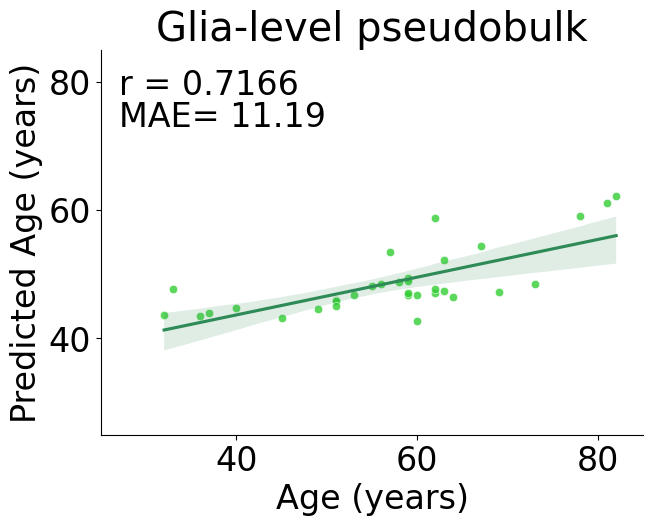

In [27]:
import matplotlib

files_to_plot = ["frohlich_pseudobulk_glia_bootstrapped100_lognormed_0.5.csv"]
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="limegreen", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="seagreen")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title("Glia-level pseudobulk")

    plt.xlim(25,85)
    plt.ylim(25,85)

    plt.annotate("MAE= " +str(mae), xy=(27,73))
    plt.annotate("r = "+str(r), xy=(27,78))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/frohlich_glia_level_pseudobulk_bootstrapped_lognormed.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

prediction file returned by: apply_non_cell_type_specific_clocks_frohlich.py

predictions can also be found in Supplementary Data 7

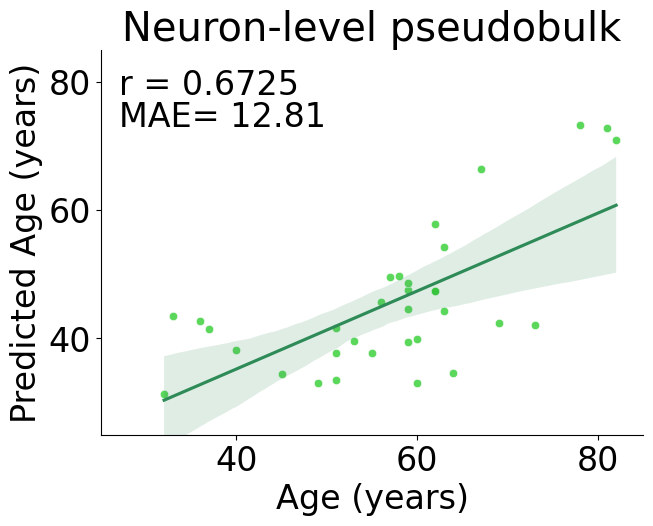

In [28]:
import matplotlib

files_to_plot = ["frohlich_pseudobulk_neuron_bootstrapped100_lognormed_0.5.csv"]
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="limegreen", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="seagreen")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title("Neuron-level pseudobulk")

    plt.xlim(25,85)
    plt.ylim(25,85)

    plt.annotate("MAE= " +str(mae), xy=(27,73))
    plt.annotate("r = "+str(r), xy=(27,78))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/frohlich_neuron_level_pseudobulk_bootstrapped_lognormed.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [18]:
results = pd.read_excel("auxiliary_files_for_figures/non_cell_type_specific_external_performance.xlsx")
results = results.sort_values(by="clock_name",ascending=False)
results

clock_name               clock_type  Frohlich_r_orig  \
2            Simple     All-cells pseudobulk             0.31   
5            Simple    Glia-level pseudobulk             0.39   
8            Simple  Neuron-level pseudobulk             0.57   
1  Bootstrapped 500     All-cells pseudobulk             0.64   
4  Bootstrapped 500    Glia-level pseudobulk             0.61   
7  Bootstrapped 500  Neuron-level pseudobulk             0.70   
0  Bootstrapped 100     All-cells pseudobulk             0.64   
3  Bootstrapped 100    Glia-level pseudobulk             0.69   
6  Bootstrapped 100  Neuron-level pseudobulk             0.66   

   Frohlich_mae_orig  Frohlich_r  Frohlich_mae  Velmeshev_r  Velmeshev_mae  \
2              10.27        0.32          9.66         0.17          26.89   
5               8.96        0.37         13.71         0.08          30.86   
8               8.93        0.59         13.33         0.31          24.59   
1              11.74        0.65          8.34         0.46          25.28   
4              12.35        0.66         11.29         0.34          25.18   
7               6.84        0.71         17.88         0.67          17.28   
0              10.10        0.66          9.13         0.50          25.61   
3               9.29        0.72         11.20         0.30          23.35   
6               7.30        0.67         12.81         0.66          16.79   

       v_color f_color  
2         grey    grey  
5         grey   green  
8         grey   green  
1         grey   green  
4         grey   green  
7  forestgreen   green  
0         grey   green  
3         grey   green  
6  forestgreen   green

Summary of the clock performances can also be found in Supplementary Data 9

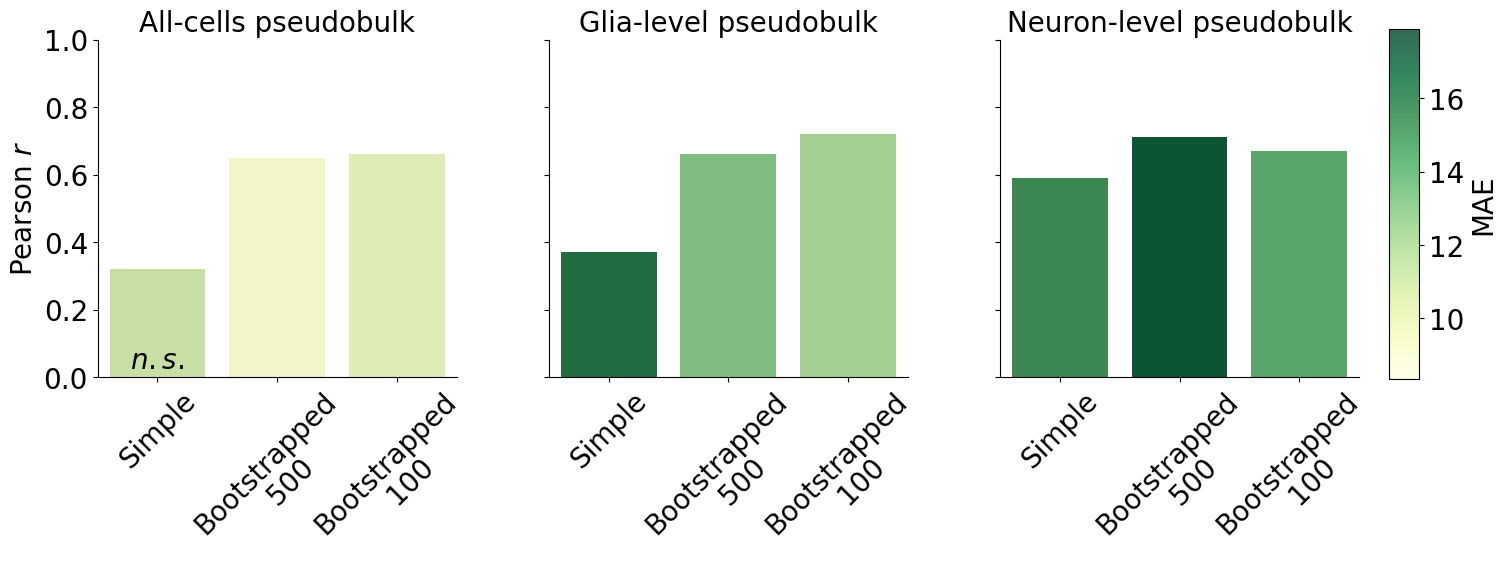

In [19]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

g=sns.catplot(data=results, x="clock_name", y="Frohlich_r", col="clock_type", kind="bar", hue="Frohlich_mae", palette="YlGn", 
              dodge = False, legend=False)
#g.bar_label(ax.containers[0], fontsize=10)
g.fig.subplots_adjust(right=.92)
cax = g.fig.add_axes([.94, .2, .02, .7])
points = plt.scatter([], [], c=[], vmin=min(results["Frohlich_mae"]), vmax=max(results["Frohlich_mae"]), cmap="YlGn", alpha=0.8)
g.fig.colorbar(points, cax=cax, label="MAE")
g.set_axis_labels("", r"Pearson $r$")
g.set_xticklabels(["Simple", "Bootstrapped\n 500", "Bootstrapped\n 100"], rotation=45)
g.set_titles("{col_name}")
g.set(ylim=(0, 1))
plt.annotate("n.s.", xy=(0,0.1), fontsize=16)
plt.gcf().set_size_inches(15,5)
ax=g.axes
ax[0][0].annotate(r"$n.s.$", xy=(0,0.05), ha='center', va='center')
#g.despine(left=True)
#plt.savefig("figures/article/results_frohlich_non_cell_type_specific_lognormed.pdf", bbox_inches="tight")
plt.show()

# Supplementary Figure 5 - Validation of aging clocks on Velmeshev et al. dataset:

prediction file returned by: apply_cell_type_specific_clocks_velmeshev.py

predictions can also be found in Supplementary Data 8

/tmp/ipykernel_3295210/912575695.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


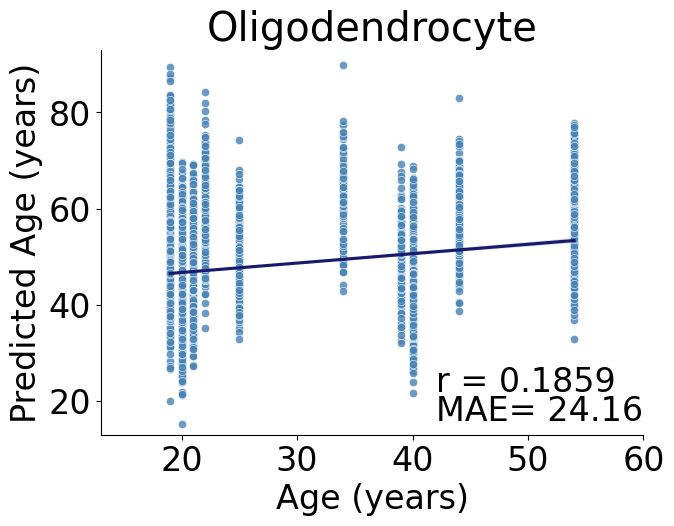

/tmp/ipykernel_3295210/912575695.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


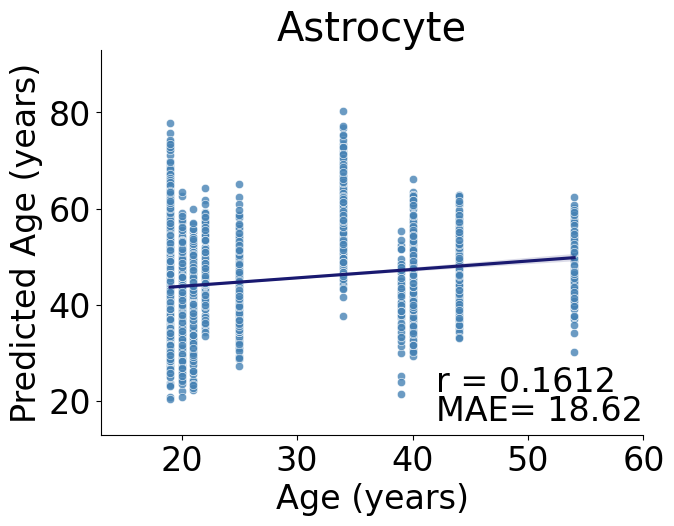

/tmp/ipykernel_3295210/912575695.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


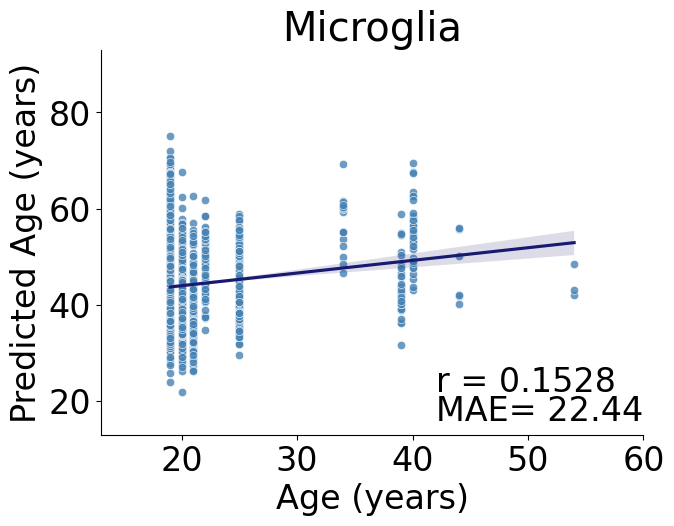

/tmp/ipykernel_3295210/912575695.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


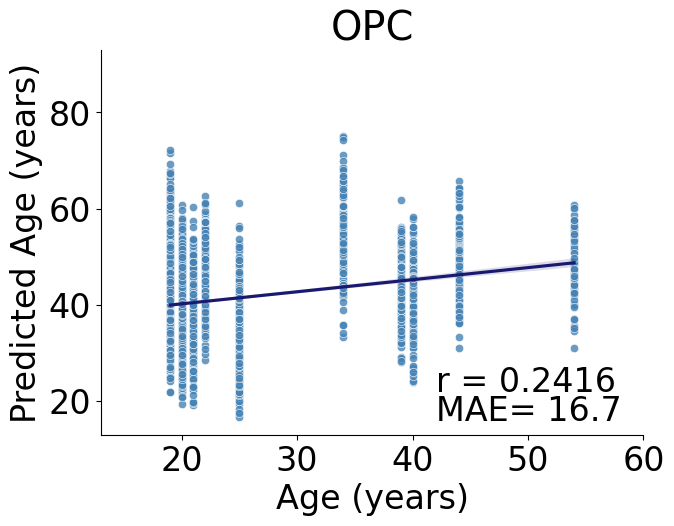

/tmp/ipykernel_3295210/912575695.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


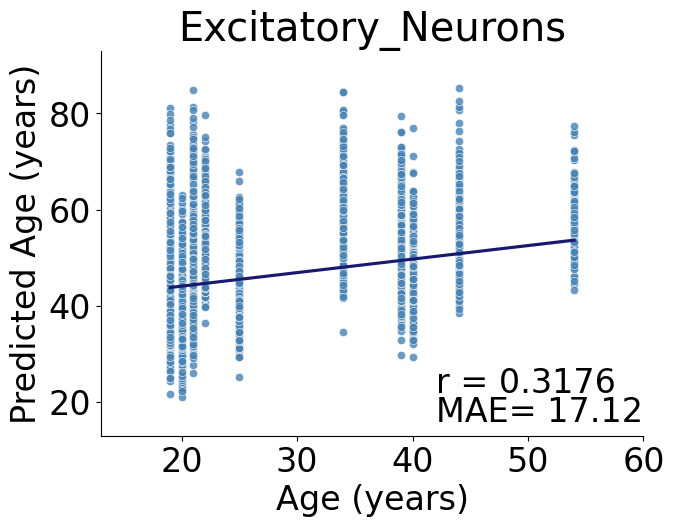

/tmp/ipykernel_3295210/912575695.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final = df_final.groupby("cell_name").mean()


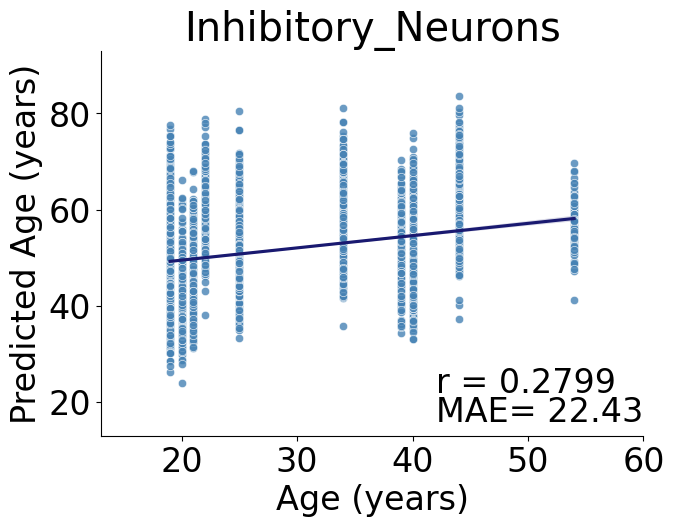

In [29]:
import matplotlib

files_to_plot = ["sc_0.5_OL.csv",
                 "sc_0.5_AST.csv",
                 "sc_0.5_MG.csv",
                 "sc_0.5_OPC.csv",
                 "sc_0.5_ExNeu.csv",
                 "sc_0.5_IN.csv"]

ct_map = {"OL": "Oligodendrocyte", "AST": "Astrocyte", "MG": "Microglia", "OPC":"OPC", "ExNeu":"Excitatory_Neurons",
         "IN":"Inhibitory_Neurons"}

for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("cell_name").mean()
    
    cell_type = file.split("_")[2][:-4]
    
    stat = stats.pearsonr(df_final["age"], df_final["predicted_age"])
    r = round(stat[0],4)
    p_value = stat[1]
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    if p_value > 0.05:
        sns.despine()
        sns.scatterplot(data=df_final, x="age", y="predicted_age", color="grey", alpha=0.8)
        sns.despine()
        sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="darkgrey")
        sns.despine()
    else:
        sns.despine()
        sns.scatterplot(data=df_final, x="age", y="predicted_age", color="steelblue", alpha=0.8)
        sns.despine()
        sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="midnightblue")
        sns.despine()
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title(ct_map[cell_type])

    plt.xlim(13,60)
    plt.ylim(13,93)

    plt.annotate("MAE= " +str(mae), xy=(42,16))
    if p_value > 0.05:
        plt.annotate("r = "+str(r), xy=(42,22), style="italic")
    else:
        plt.annotate("r = "+str(r), xy=(42,22))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/velmeshev_sc_"+cell_type+".pdf", bbox_inches="tight")
    plt.show()
    plt.close()

prediction file returned by: apply_cell_type_specific_clocks_velmeshev.py

predictions can also be found in Supplementary Data 8

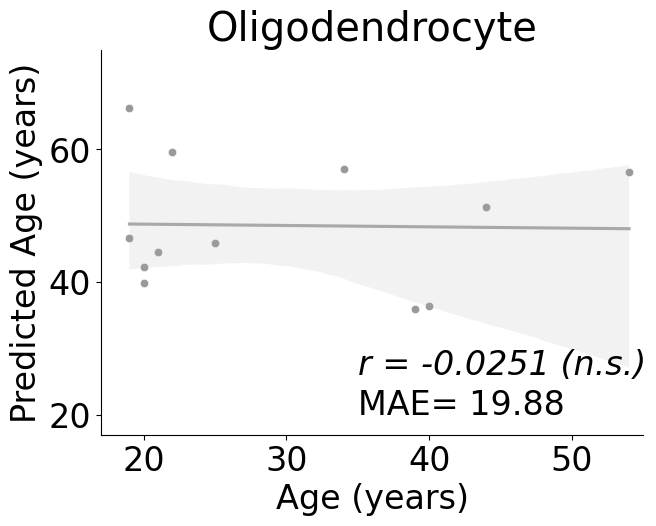

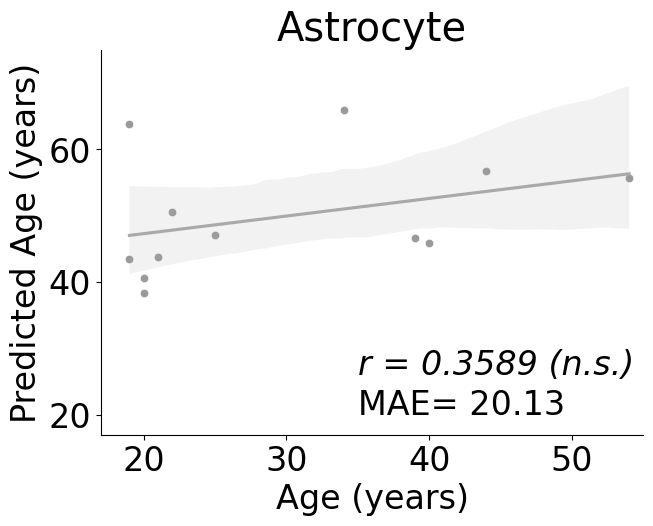

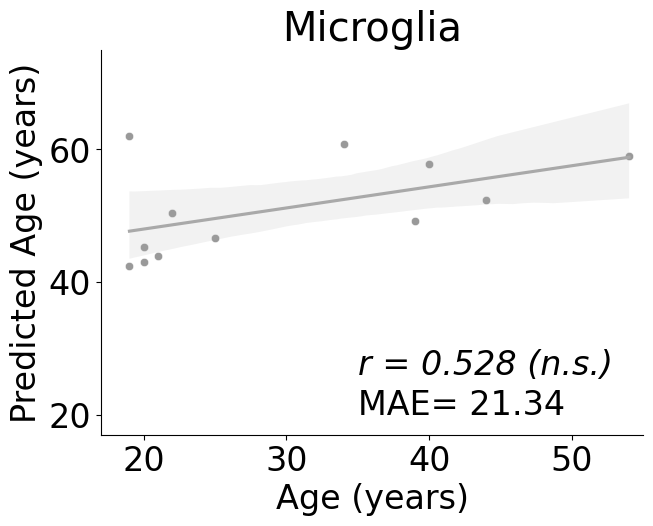

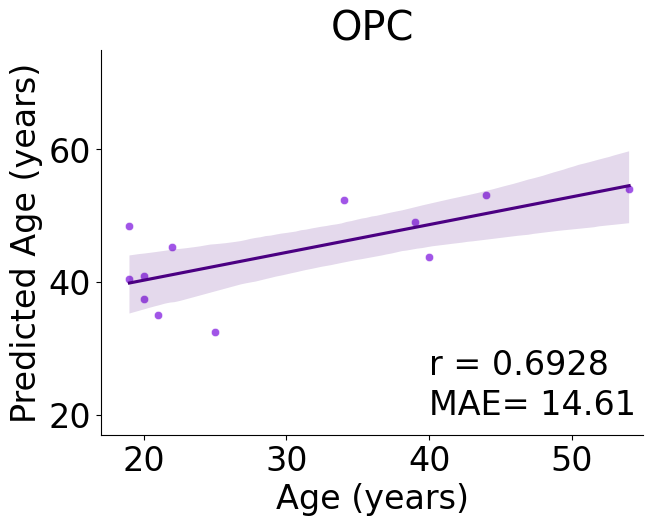

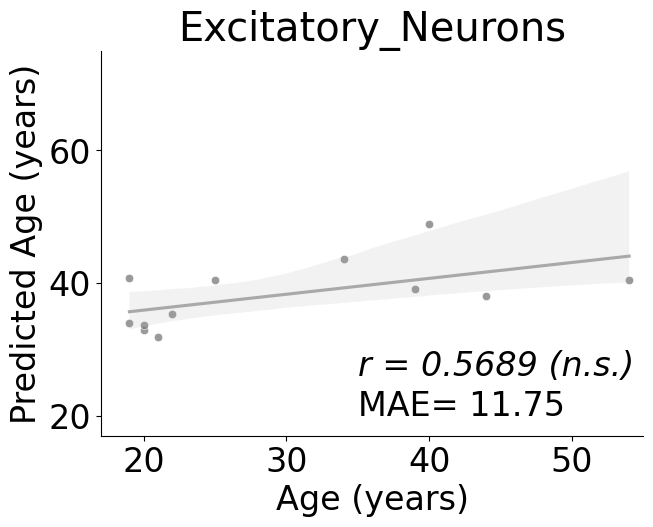

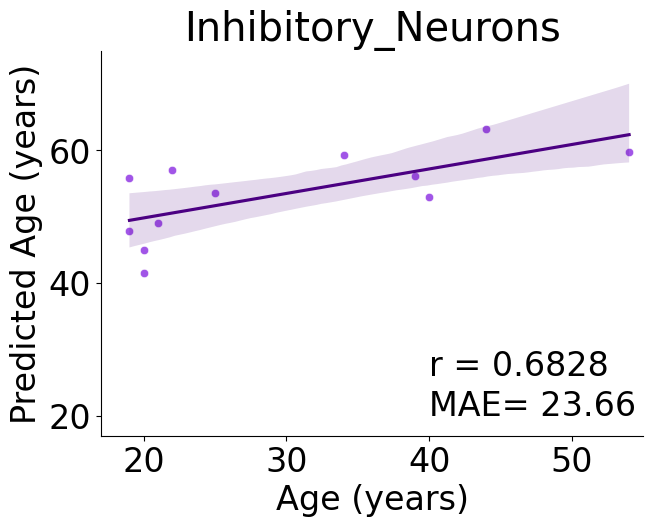

In [30]:
import matplotlib

files_to_plot = ["celltype_pseudobulk_bootstrapped_0.5_OL.csv",
                 "celltype_pseudobulk_bootstrapped_0.5_AST.csv",
                 "celltype_pseudobulk_bootstrapped_0.5_MG.csv",
                 "celltype_pseudobulk_bootstrapped_0.5_OPC.csv",
                 "celltype_pseudobulk_bootstrapped_0.5_ExNeu.csv",
                 "celltype_pseudobulk_bootstrapped_0.5_IN.csv"]

ct_map = {"OL": "Oligodendrocyte", "AST": "Astrocyte", "MG": "Microglia", "OPC":"OPC", "ExNeu":"Excitatory_Neurons",
         "IN":"Inhibitory_Neurons"}

for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    cell_type = file.split("_")[4][:-4]
    
    stat = stats.pearsonr(df_final["age"], df_final["predicted_age"])
    r = round(stat[0],4)
    p_value = stat[1]
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    if p_value > 0.05:
        sns.despine()
        sns.scatterplot(data=df_final, x="age", y="predicted_age", color="grey", alpha=0.8)
        sns.despine()
        sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="darkgrey")
        sns.despine()
    else:
        sns.despine()
        sns.scatterplot(data=df_final, x="age", y="predicted_age", color="blueviolet", alpha=0.8)
        sns.despine()
        sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="indigo")
        sns.despine()
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title(ct_map[cell_type])

    plt.xlim(17,55)
    plt.ylim(17,75)

    if p_value > 0.05:
        plt.annotate("MAE= " +str(mae), xy=(35,20))
        plt.annotate("r = "+str(r)+" (n.s.)", xy=(35,26), style="italic")
    else:
        plt.annotate("MAE= " +str(mae), xy=(40,20))
        plt.annotate("r = "+str(r), xy=(40,26))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/velmeshev_pseudobulk_bootstrapped_"+cell_type+".pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [16]:
results = pd.read_excel("auxiliary_files_for_figures/cell_type_specific_external_performance.xlsx")
results

cell_type               clock_type  Frohlich_r_orig  \
0     Oligodendrocytes              Single-cell             0.32   
1     Oligodendrocytes               Pseudobulk             0.53   
2     Oligodendrocytes  Bootstrapped pseudobulk             0.60   
3           Astrocytes              Single-cell             0.50   
4           Astrocytes               Pseudobulk             0.68   
5           Astrocytes  Bootstrapped pseudobulk             0.73   
6            Microglia              Single-cell             0.34   
7            Microglia               Pseudobulk             0.54   
8            Microglia  Bootstrapped pseudobulk             0.65   
9                 OPCs              Single-cell             0.42   
10                OPCs               Pseudobulk             0.79   
11                OPCs  Bootstrapped pseudobulk             0.78   
12  Excitatory_Neurons              Single-cell             0.55   
13  Excitatory_Neurons               Pseudobulk             0.68   
14  Excitatory_Neurons  Bootstrapped pseudobulk             0.78   
15  Inhibitory_Neurons              Single-cell             0.23   
16  Inhibitory_Neurons               Pseudobulk             0.42   
17  Inhibitory_Neurons  Bootstrapped pseudobulk             0.56   

    Frohlich_mae_orig  Frohlich_r  Frohlich_mae  Velmeshev_r  Velmeshev_mae  \
0                8.94        0.32         10.39         0.19          24.16   
1               11.04        0.53         13.05        -0.26          24.02   
2               15.58        0.60         22.93        -0.03          19.88   
3                8.15        0.49          9.88         0.16          18.62   
4                9.19        0.66          9.86         0.35          22.82   
5                7.13        0.72          8.37         0.36          20.13   
6                9.27        0.32         10.66         0.15          22.44   
7                9.25        0.46          9.65         0.28          27.18   
8                7.66        0.63          7.28         0.53          21.34   
9                8.85        0.42         10.67         0.24          16.70   
10               8.18        0.79          9.17         0.77          17.94   
11               8.49        0.78         12.78         0.69          14.61   
12               7.60        0.53          9.72         0.32          17.12   
13               7.87        0.69         12.30         0.05          17.83   
14               8.84        0.77          8.30         0.57          11.75   
15               9.98        0.24         13.18         0.28          22.44   
16              10.41        0.46         10.02         0.61          28.93   
17               9.09        0.60         11.64         0.68          23.66   

       v_color  
0   blueviolet  
1         grey  
2         grey  
3   blueviolet  
4         grey  
5         grey  
6   blueviolet  
7         grey  
8         grey  
9   blueviolet  
10  blueviolet  
11  blueviolet  
12  blueviolet  
13        grey  
14        grey  
15  blueviolet  
16  blueviolet  
17  blueviolet

Summary of the clock performances can also be found in Supplementary Data 9

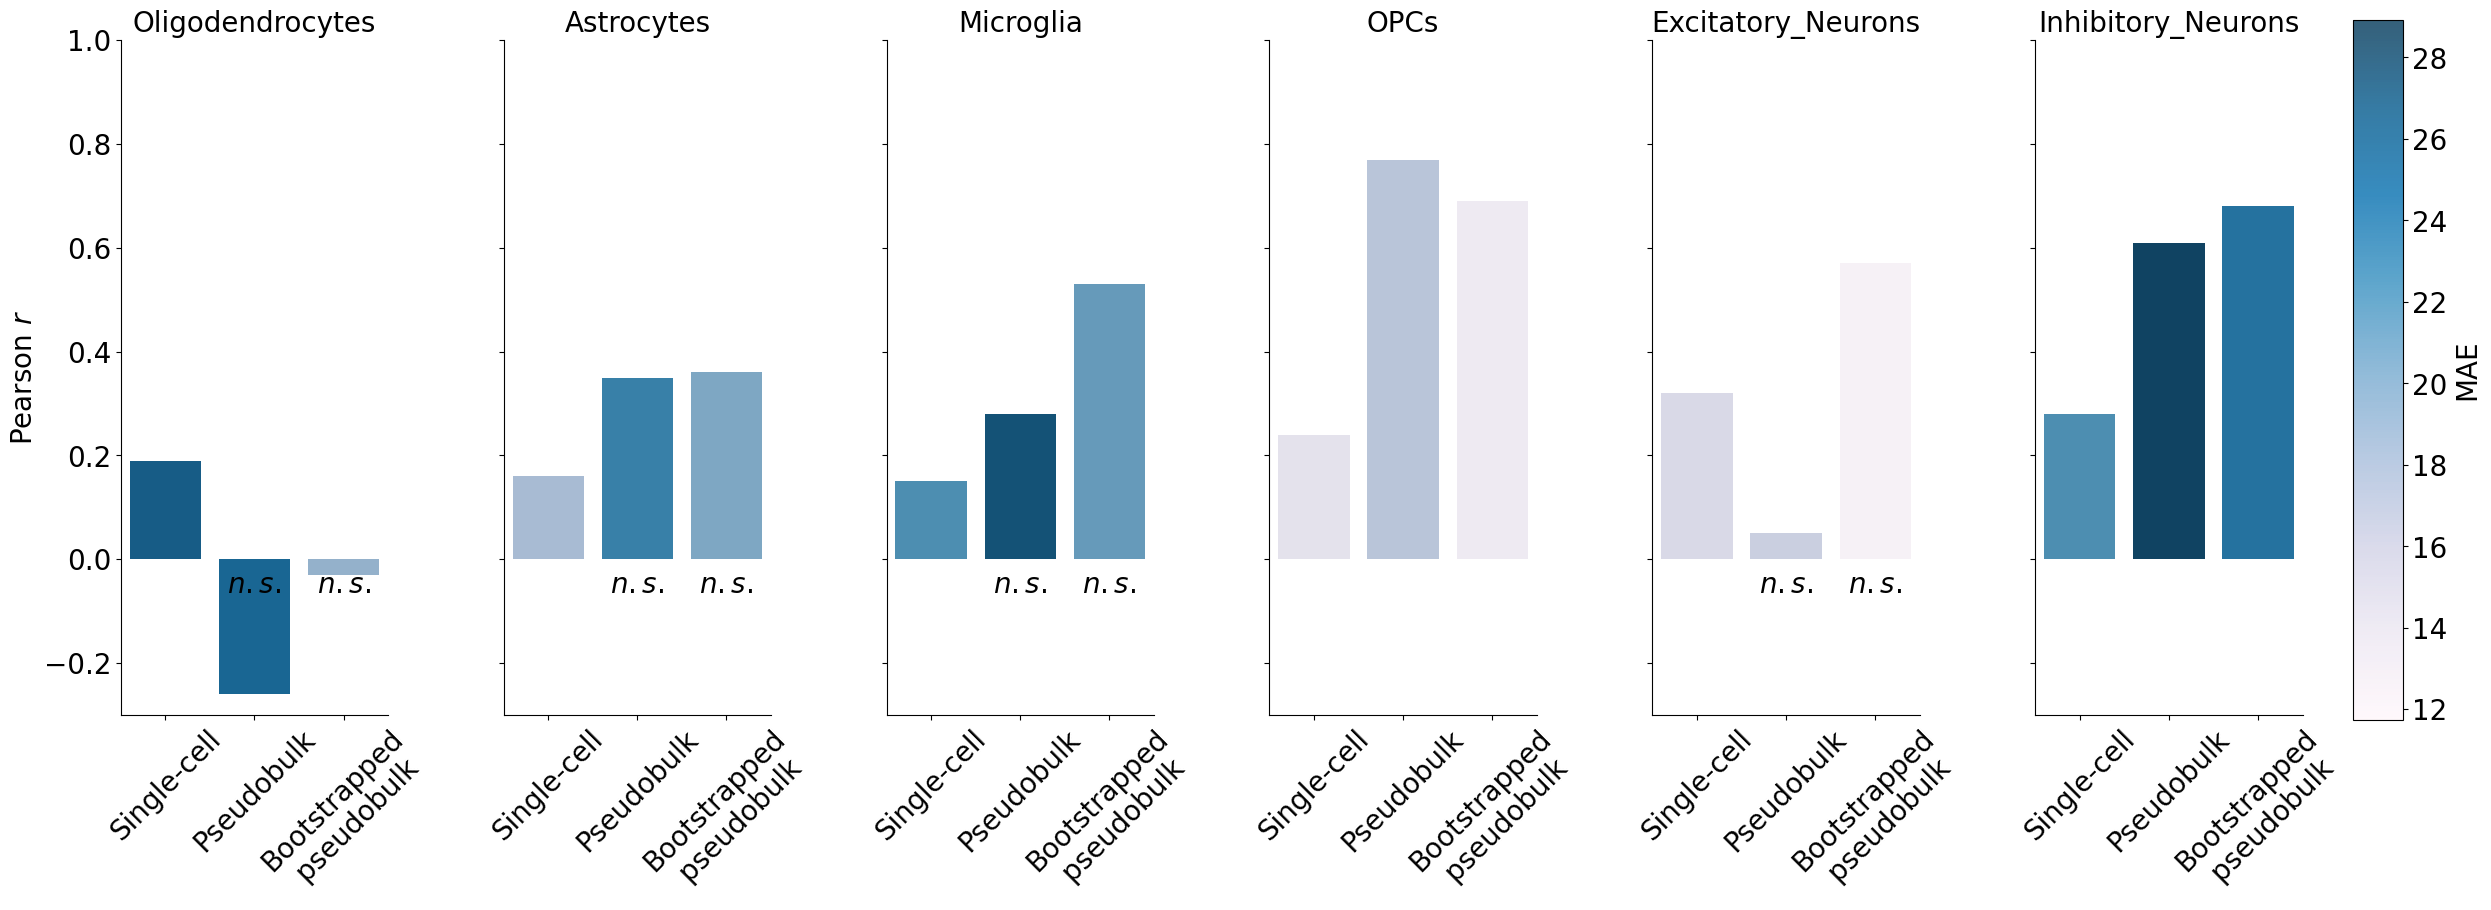

In [17]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

g=sns.catplot(data=results, x="clock_type", y="Velmeshev_r", col="cell_type", kind="bar", hue="Velmeshev_mae", palette="PuBu", 
              dodge = False, legend=False)
#g.bar_label(ax.containers[0], fontsize=10)
g.fig.subplots_adjust(right=.92)
cax = g.fig.add_axes([.94, .2, .02, .7])
points = plt.scatter([], [], c=[], vmin=min(results["Velmeshev_mae"]), vmax=max(results["Velmeshev_mae"]), cmap="PuBu", alpha=0.8)
g.fig.colorbar(points, cax=cax, label="MAE")
g.set_axis_labels("", r"Pearson $r$")
g.set_xticklabels(["Single-cell", "Pseudobulk", "Bootstrapped\n pseudobulk"], rotation=45)
g.set_titles("{col_name}")
g.set(ylim=(-0.3, 1))
plt.gcf().set_size_inches(25, 10)

ax=g.axes
ax[0][0].annotate(r"$n.s.$", xy=(1,-0.05), ha='center', va='center')
ax[0][0].annotate(r"$n.s.$", xy=(2,-0.05), ha='center', va='center')
ax[0][1].annotate(r"$n.s.$", xy=(1,-0.05), ha='center', va='center')
ax[0][1].annotate(r"$n.s.$", xy=(2,-0.05), ha='center', va='center')
ax[0][2].annotate(r"$n.s.$", xy=(1,-0.05), ha='center', va='center')
ax[0][2].annotate(r"$n.s.$", xy=(2,-0.05), ha='center', va='center')
ax[0][4].annotate(r"$n.s.$", xy=(1,-0.05), ha='center', va='center')
ax[0][4].annotate(r"$n.s.$", xy=(2,-0.05), ha='center', va='center')

#g.despine(left=True)
#plt.savefig("figures/article/results_velmeshev_cell_type_specific.pdf", bbox_inches="tight")
plt.show()

prediction file returned by: apply_non_cell_type_specific_clocks_velmeshev.py

predictions can also be found in Supplementary Data 8

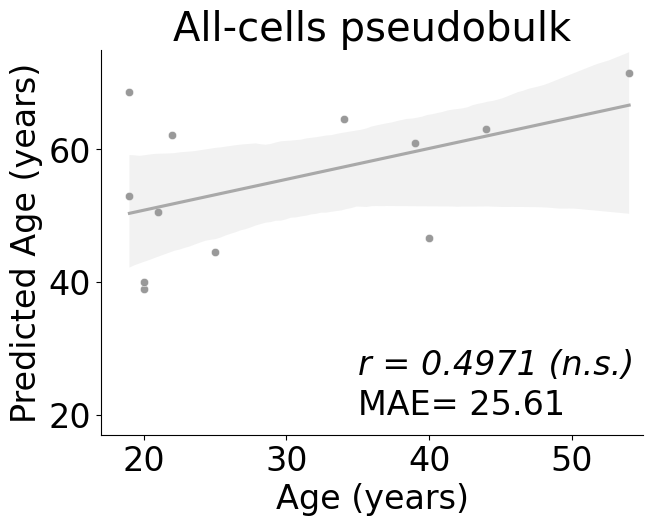

In [31]:
import matplotlib

files_to_plot = ["pseudobulk_bootstrapped100_0.5.csv"]
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="grey", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="darkgrey")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title("All-cells pseudobulk")

    plt.xlim(17,55)
    plt.ylim(17,75)

    plt.annotate("MAE= " +str(mae), xy=(35,20))
    plt.annotate("r = "+str(r)+" (n.s.)", xy=(35,26), style="italic")
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/velmeshev_allcells_pseudobulk_bootstrapped_v2.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

prediction file returned by: apply_non_cell_type_specific_clocks_velmeshev.py

predictions can also be found in Supplementary Data 8

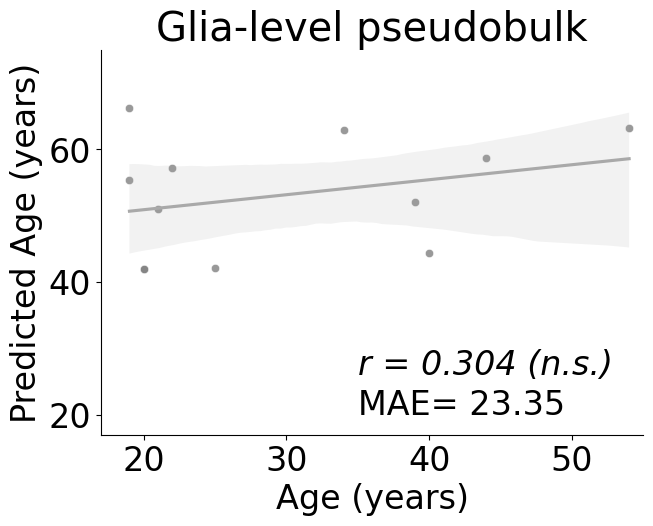

In [32]:
import matplotlib

files_to_plot = ["pseudobulk_glia_bootstrapped100_0.5.csv"]
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="grey", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="darkgrey")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title("Glia-level pseudobulk")

    plt.xlim(17,55)
    plt.ylim(17,75)

    plt.annotate("MAE= " +str(mae), xy=(35,20))
    plt.annotate("r = "+str(r)+" (n.s.)", xy=(35,26), style="italic")
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/velmeshev_glia_level_pseudobulk_bootstrapped.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

prediction file returned by: apply_non_cell_type_specific_clocks_velmeshev.py

predictions can also be found in Supplementary Data 8

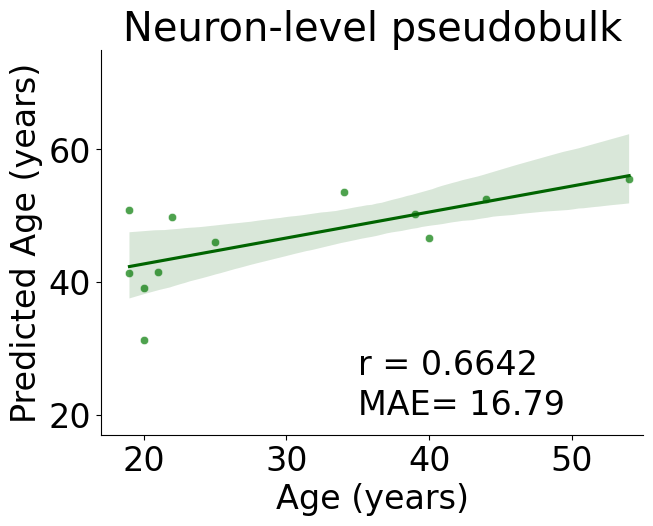

In [33]:
import matplotlib

files_to_plot = ["pseudobulk_neuron_bootstrapped100_0.5.csv"]
for file in files_to_plot:
    fig = plt.figure(figsize=(7,5))
    matplotlib.rcParams.update({'font.size': 24})
    
    df_final = pd.read_csv("application_of_clocks/"+file)
    df_final = df_final.groupby("donor").mean()
    
    sns.despine()
    sns.scatterplot(data=df_final, x="age", y="predicted_age", color="forestgreen", alpha=0.8)
    sns.despine()
    sns.regplot(data=df_final, x="age", y="predicted_age", scatter=False, color="darkgreen")
    sns.despine()
    #plt.plot(range(10,100), range(10,100), color="grey", linestyle="dashed")
    
    r = round(stats.pearsonr(df_final["age"], df_final["predicted_age"])[0],4)
    mae = round(mean_absolute_error(df_final["age"],df_final["predicted_age"]),2)
    
    plt.xlabel("Age (years)")
    plt.ylabel("Predicted Age (years)")
    plt.title("Neuron-level pseudobulk")

    plt.xlim(17,55)
    plt.ylim(17,75)

    plt.annotate("MAE= " +str(mae), xy=(35,20))
    plt.annotate("r = "+str(r), xy=(35,26))
    #plt.annotate("n = "+str(len(df_final)), xy=(70,27))
    #plt.savefig("figures/article/velmeshev_neuron_level_pseudobulk_bootstrapped.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

In [20]:
results = pd.read_excel("auxiliary_files_for_figures/non_cell_type_specific_external_performance.xlsx")
results = results.sort_values(by="clock_name",ascending=False)
results

clock_name               clock_type  Frohlich_r_orig  \
2            Simple     All-cells pseudobulk             0.31   
5            Simple    Glia-level pseudobulk             0.39   
8            Simple  Neuron-level pseudobulk             0.57   
1  Bootstrapped 500     All-cells pseudobulk             0.64   
4  Bootstrapped 500    Glia-level pseudobulk             0.61   
7  Bootstrapped 500  Neuron-level pseudobulk             0.70   
0  Bootstrapped 100     All-cells pseudobulk             0.64   
3  Bootstrapped 100    Glia-level pseudobulk             0.69   
6  Bootstrapped 100  Neuron-level pseudobulk             0.66   

   Frohlich_mae_orig  Frohlich_r  Frohlich_mae  Velmeshev_r  Velmeshev_mae  \
2              10.27        0.32          9.66         0.17          26.89   
5               8.96        0.37         13.71         0.08          30.86   
8               8.93        0.59         13.33         0.31          24.59   
1              11.74        0.65          8.34         0.46          25.28   
4              12.35        0.66         11.29         0.34          25.18   
7               6.84        0.71         17.88         0.67          17.28   
0              10.10        0.66          9.13         0.50          25.61   
3               9.29        0.72         11.20         0.30          23.35   
6               7.30        0.67         12.81         0.66          16.79   

       v_color f_color  
2         grey    grey  
5         grey   green  
8         grey   green  
1         grey   green  
4         grey   green  
7  forestgreen   green  
0         grey   green  
3         grey   green  
6  forestgreen   green

Summary of the clock performances can also be found in Supplementary Data 9

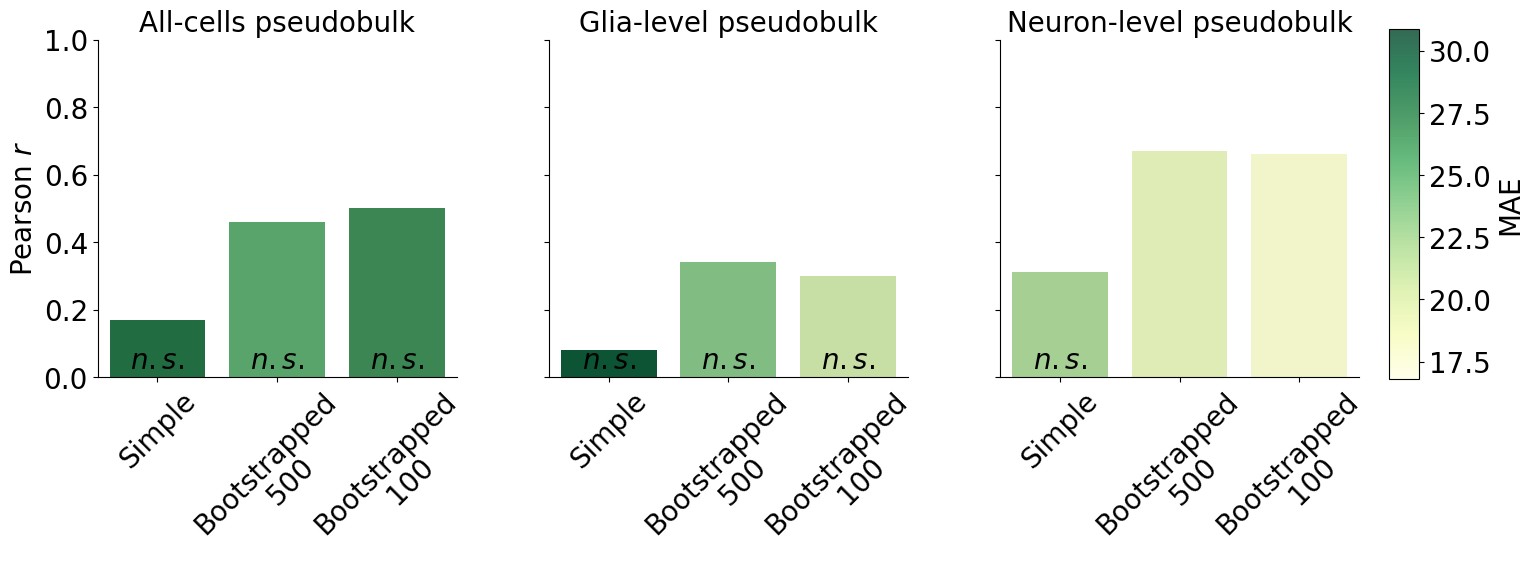

In [21]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

g=sns.catplot(data=results, x="clock_name", y="Velmeshev_r", col="clock_type", kind="bar", hue="Velmeshev_mae", palette="YlGn", 
              dodge = False, legend=False)
#g.bar_label(ax.containers[0], fontsize=10)
g.fig.subplots_adjust(right=.92)
cax = g.fig.add_axes([.94, .2, .02, .7])
points = plt.scatter([], [], c=[], vmin=min(results["Velmeshev_mae"]), vmax=max(results["Velmeshev_mae"]), cmap="YlGn", alpha=0.8)
g.fig.colorbar(points, cax=cax, label="MAE")
g.set_axis_labels("", r"Pearson $r$")
g.set_xticklabels(["Simple", "Bootstrapped\n 500", "Bootstrapped\n 100"], rotation=45)
g.set_titles("{col_name}")
g.set(ylim=(0, 1))
plt.annotate("n.s.", xy=(0,0.1), fontsize=16)
plt.gcf().set_size_inches(15,5)
ax=g.axes
ax[0][0].annotate(r"$n.s.$", xy=(0,0.05), ha='center', va='center')
ax[0][0].annotate(r"$n.s.$", xy=(1,0.05), ha='center', va='center')
ax[0][0].annotate(r"$n.s.$", xy=(2,0.05), ha='center', va='center')
ax[0][1].annotate(r"$n.s.$", xy=(0,0.05), ha='center', va='center')
ax[0][1].annotate(r"$n.s.$", xy=(1,0.05), ha='center', va='center')
ax[0][1].annotate(r"$n.s.$", xy=(2,0.05), ha='center', va='center')
ax[0][2].annotate(r"$n.s.$", xy=(0,0.05), ha='center', va='center')

#plt.savefig("figures/article/results_velmeshev_non_cell_type_specific.pdf", bbox_inches="tight")
#g.despine(left=True)
plt.show()